In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("project2-data.csv")

In [ ]:
data.head(10)

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y
5,CPL001011,M,Y,Alf,Banger,abanger6@51.la,62479 Tony Trail,2,Grad,Y,6500.4,5035.2,320.4,360.0,1.0,Urban,1706531990,36-046-3652,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,Y
6,CPL001013,M,Y,Gunilla,Etchells,getchells7@oracle.com,19 Nevada Road,0,Non Grad,N,2799.6,1819.2,114.0,360.0,1.0,Urban,4308436125,30-577-3135,Mozilla/5.0 (X11; Linux i686) AppleWebKit/535....,Y
7,CPL001014,M,Y,Norman,Code,ncode8@php.net,6444 Grasskamp Parkway,3+,Grad,N,3643.2,3004.8,189.6,360.0,0.0,Semi U,8920517681,84-493-5438,Mozilla/5.0 (Windows NT 6.1; rv:12.0) Gecko/ 2...,N
8,CPL001018,M,Y,Ramsay,Willoughby,rwilloughbya@sun.com,7530 Karstens Trail,2,Grad,N,4807.2,1831.2,201.6,360.0,1.0,Urban,6575222730,70-958-5848,Mozilla/6.0 (Windows NT 6.2; WOW64; rv:16.0.1)...,Y
9,CPL001020,M,Y,Elsa,Hickenbottom,ehickenbottomb@storify.com,54 Delaware Avenue,1,Grad,N,15409.2,13161.6,418.8,360.0,1.0,Semi U,3424435449,91-805-0829,Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWe...,N


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loanapp_ID      614 non-null    object 
 1   Sex             601 non-null    object 
 2   Marital_Status  611 non-null    object 
 3   first_name      614 non-null    object 
 4   last_name       614 non-null    object 
 5   email           614 non-null    object 
 6   address         614 non-null    object 
 7   Dependents      599 non-null    object 
 8   Qual_var        614 non-null    object 
 9   SE              582 non-null    object 
 10  App_Income_1    614 non-null    float64
 11  App_Income_2    614 non-null    float64
 12  CPL_Amount      612 non-null    float64
 13  CPL_Term        600 non-null    float64
 14  Credit_His      564 non-null    float64
 15  Prop_Area       614 non-null    object 
 16  INT_ID          614 non-null    int64  
 17  Prev_ID         614 non-null    obj

In [ ]:
data.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
count,614.000000,614.000000,612.000000,600.00000,564.000000,6.140000e+02
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199,5.055666e+09
std,7330.850008,3511.498043,102.606123,65.12041,0.364878,2.890445e+09
min,180.000000,0.000000,10.800000,12.00000,0.000000,1.788664e+07
25%,3453.000000,0.000000,120.000000,360.00000,1.000000,2.561243e+09
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000,5.244783e+09
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000,7.495052e+09
max,97200.000000,50000.400000,840.000000,480.00000,1.000000,9.989158e+09


In [ ]:
data.shape

(614, 20)

In [ ]:
data.keys()

Index(['Loanapp_ID', 'Sex', 'Marital_Status', 'first_name', 'last_name',
       'email', 'address', 'Dependents', 'Qual_var', 'SE', 'App_Income_1',
       'App_Income_2', 'CPL_Amount', 'CPL_Term', 'Credit_His', 'Prop_Area',
       'INT_ID', 'Prev_ID', 'AGT_ID', 'CPL_Status'],
      dtype='object')

In [ ]:
data.isnull().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

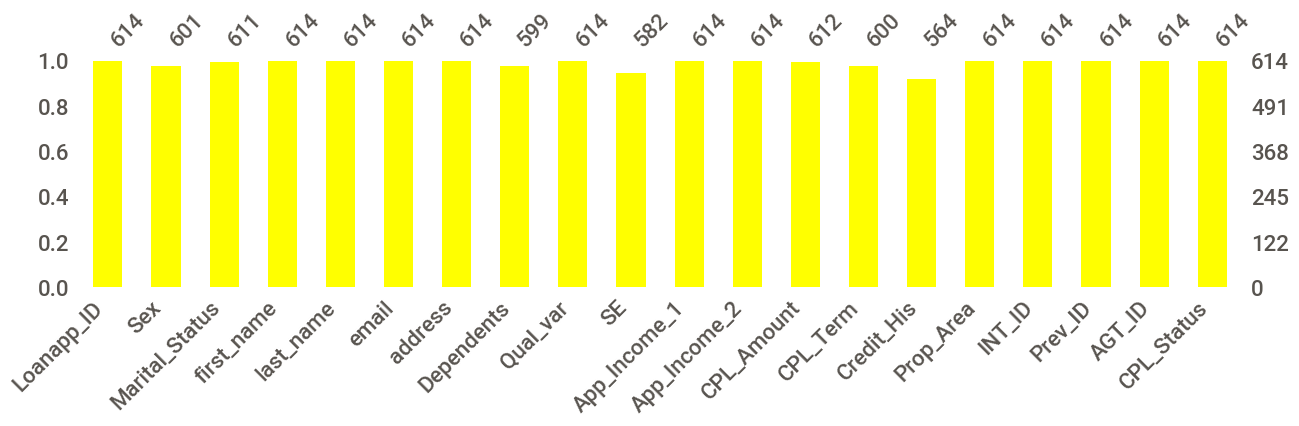

In [ ]:
#visualising the null value
import missingno as msno
msno.bar(data,figsize=(15,3),color='yellow')
plt.show()

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
my_report = sv.analyze([data, "data"],target_feat='CPL_Status')

                                             |          | [  0%]   00:00 -> (? left)


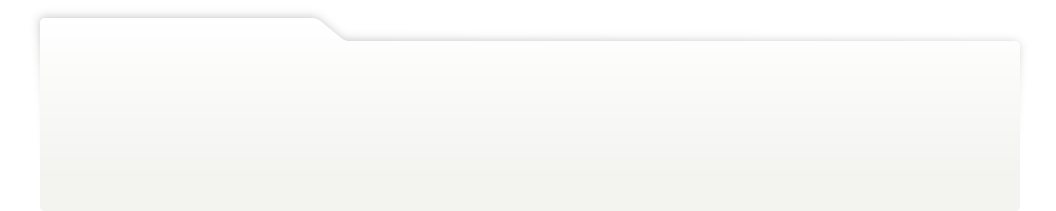
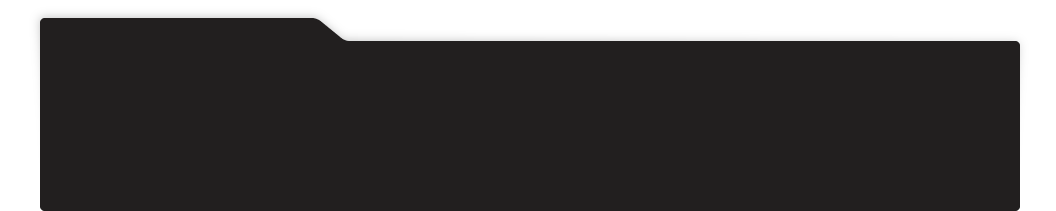
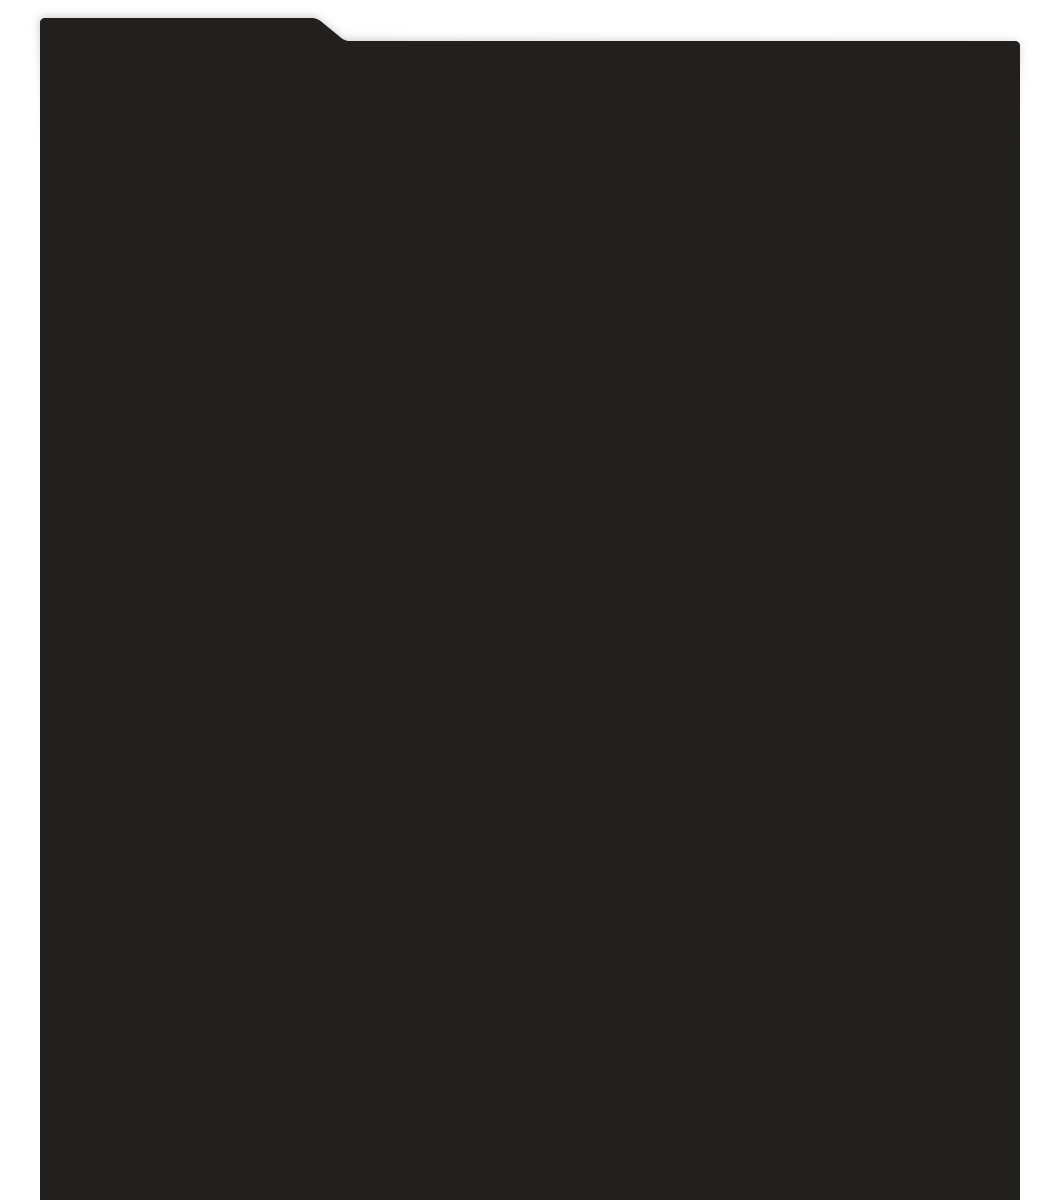
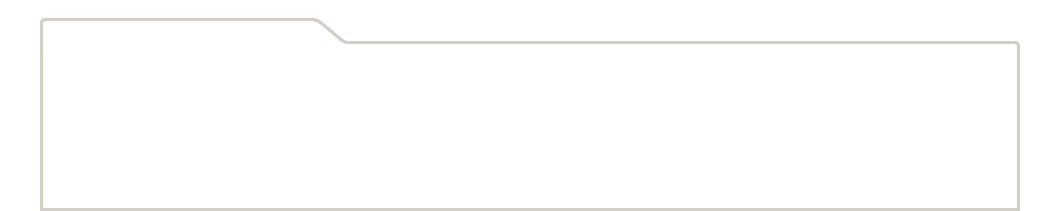
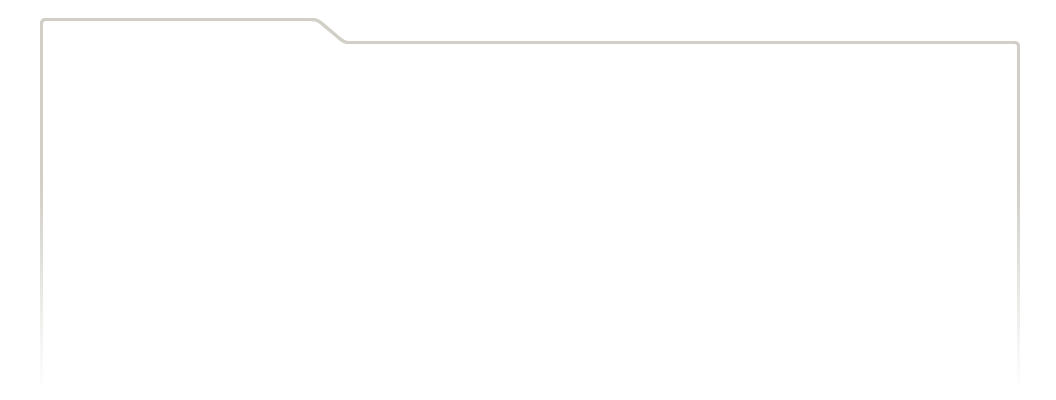
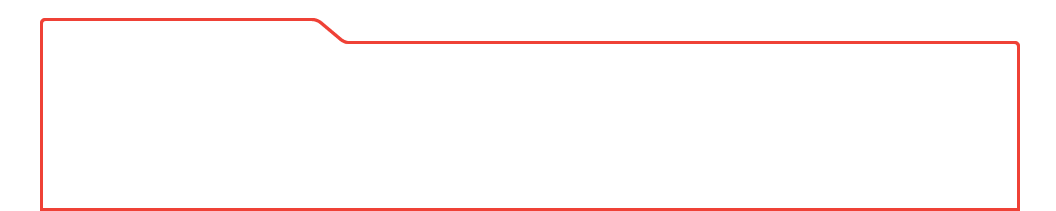
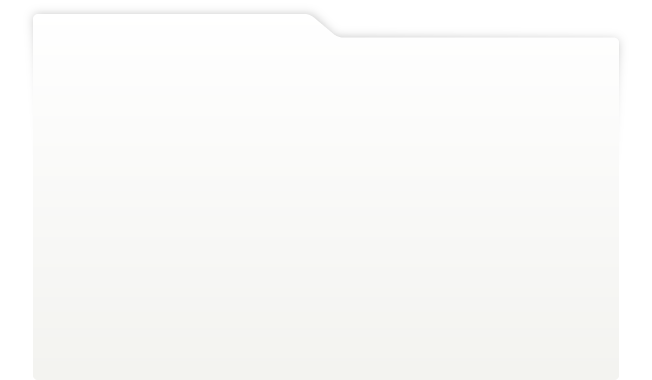
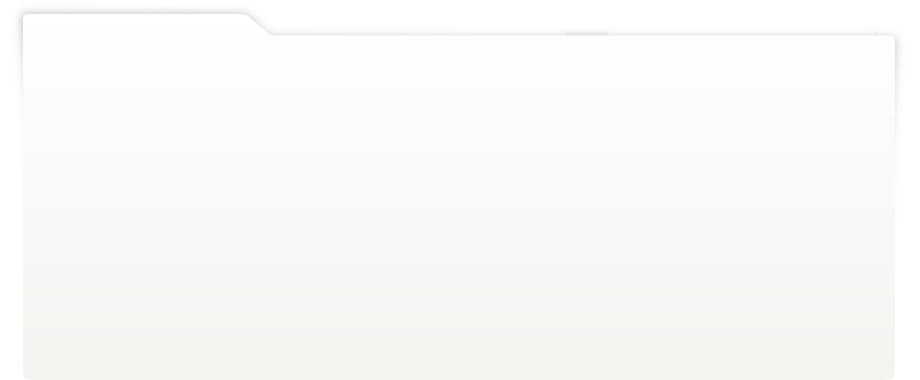
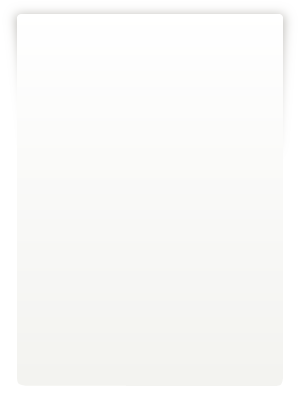
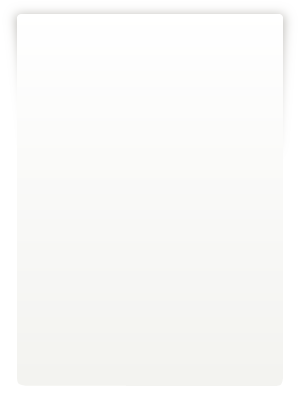
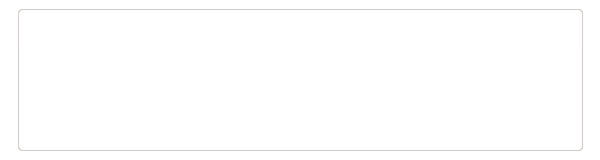
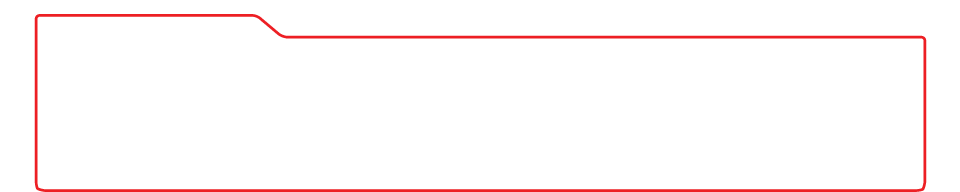
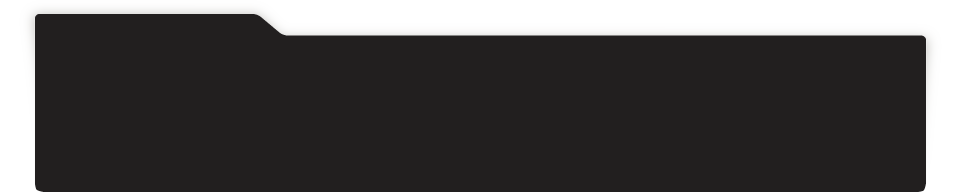
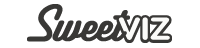
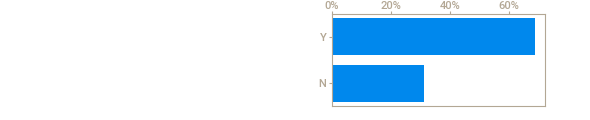
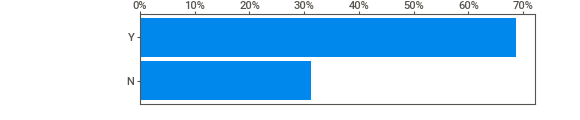
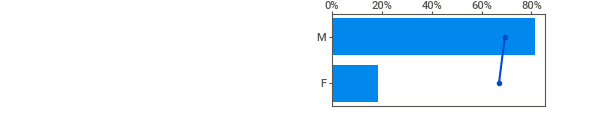
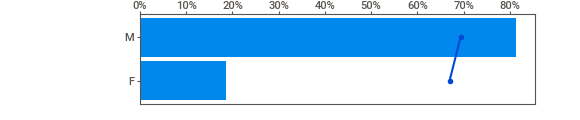
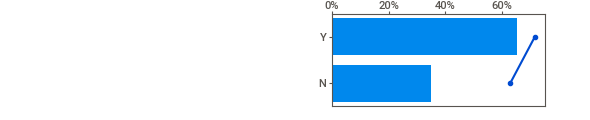
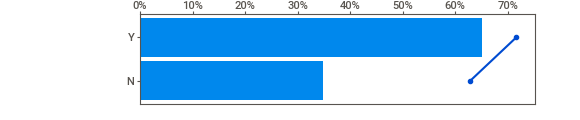
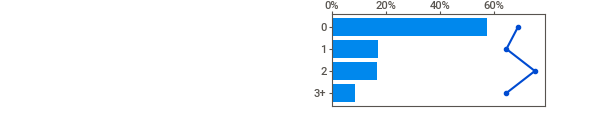
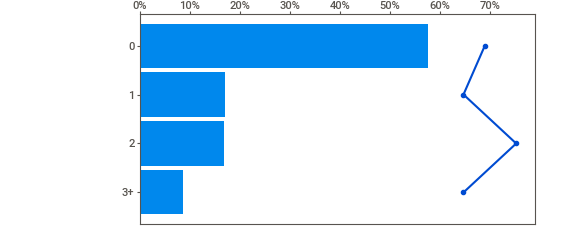
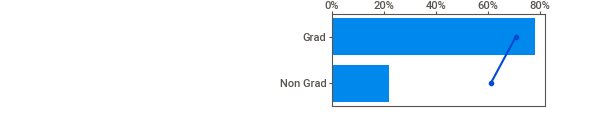
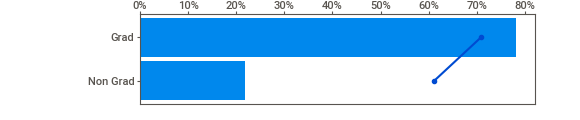
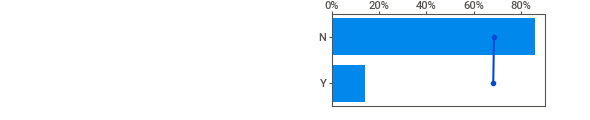
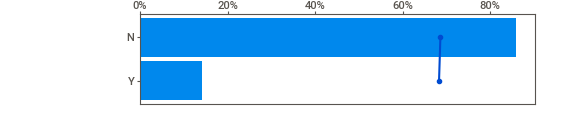
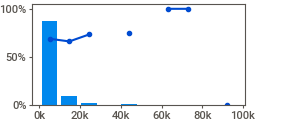
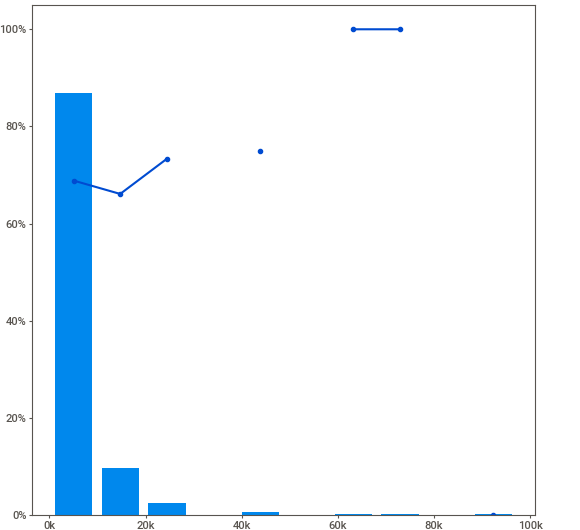
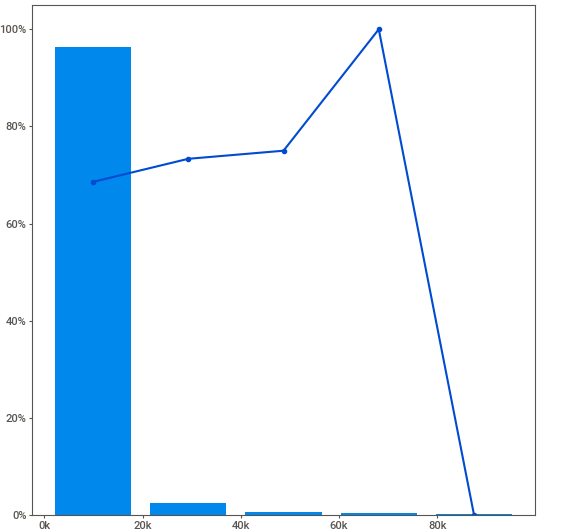
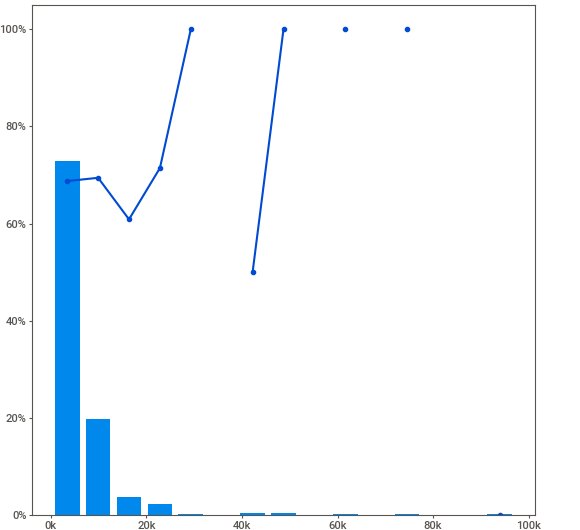
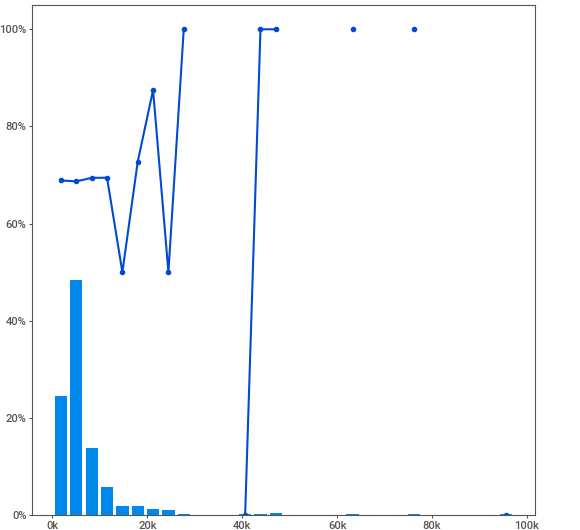
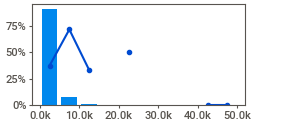
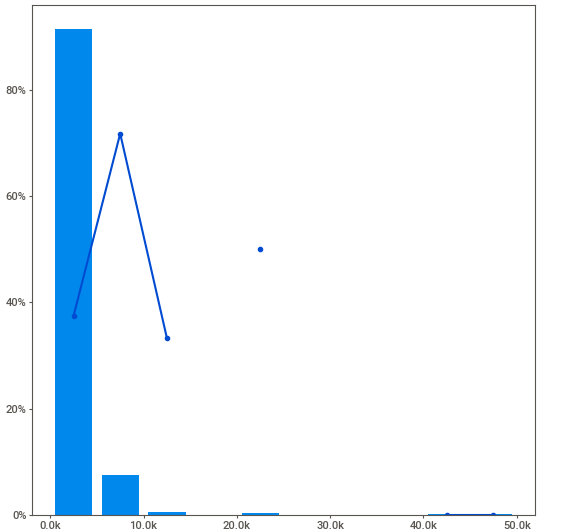
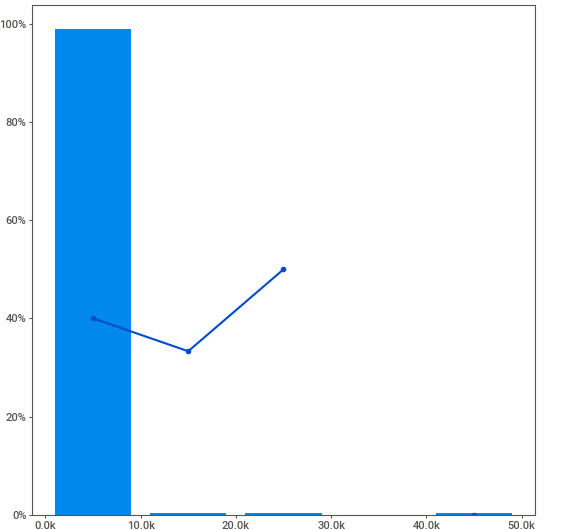
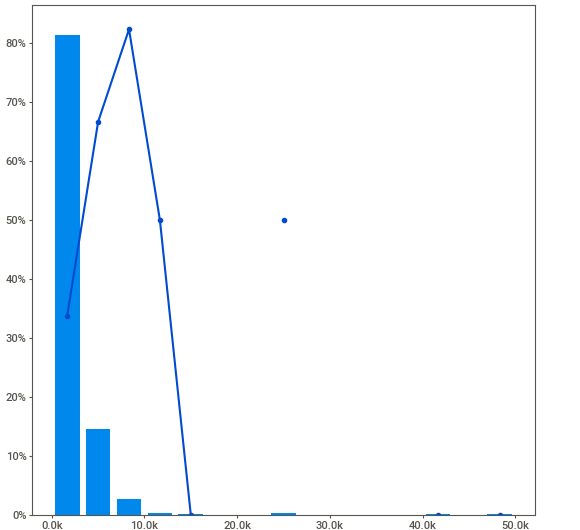
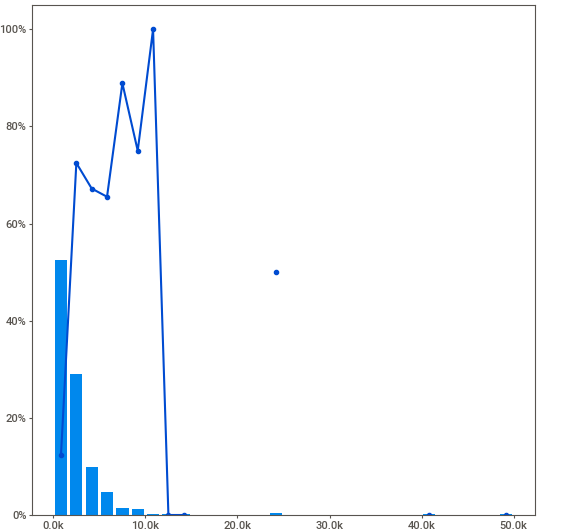
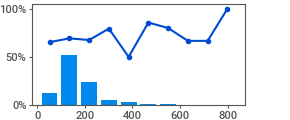
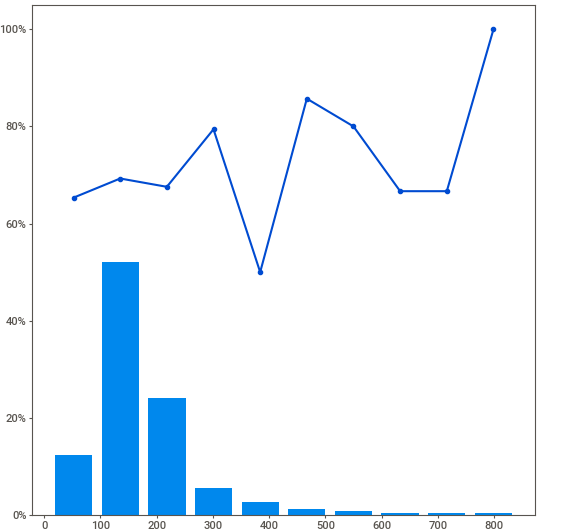
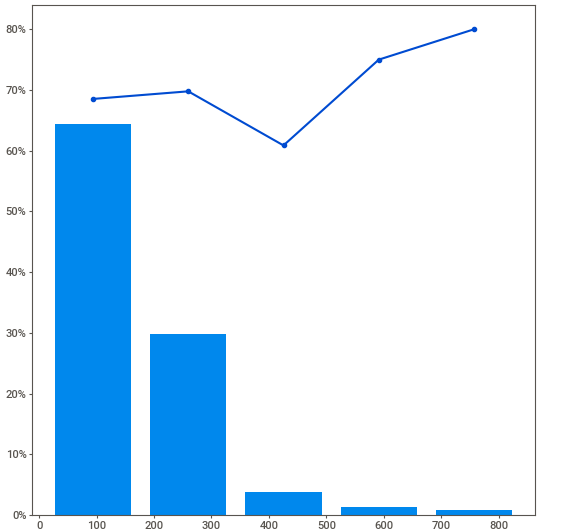
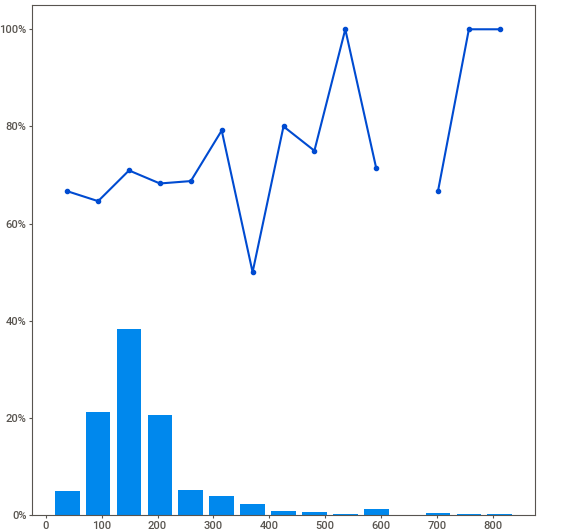
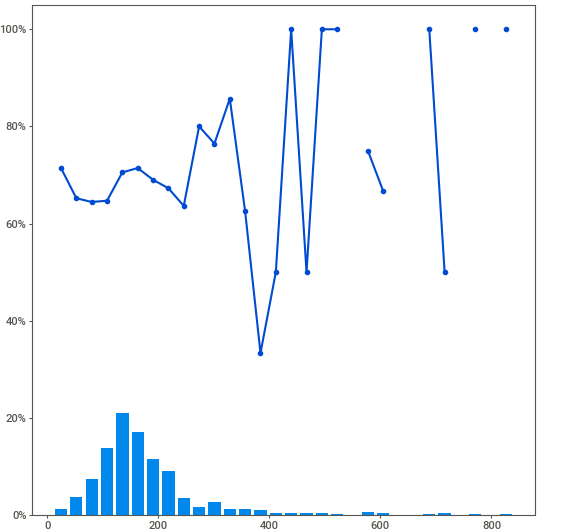
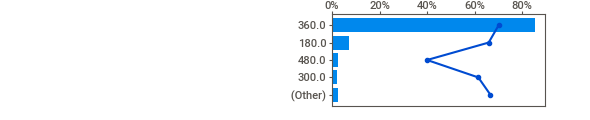
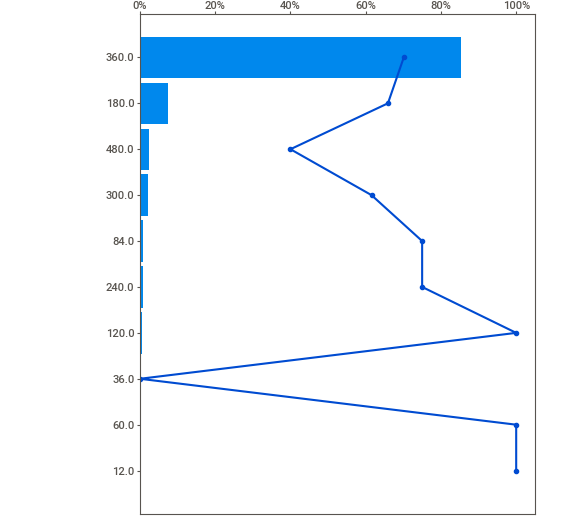
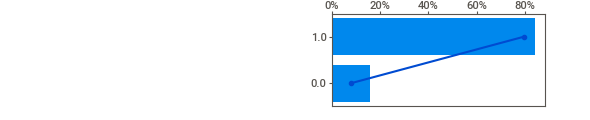
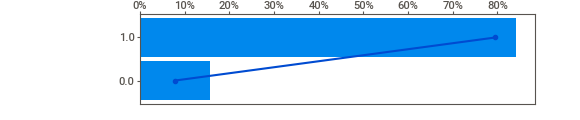
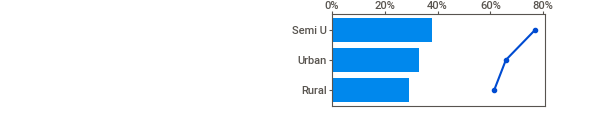
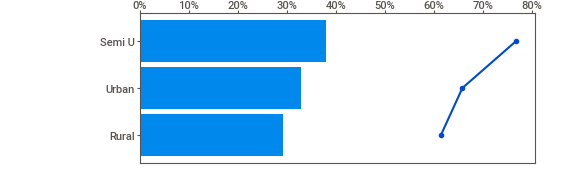
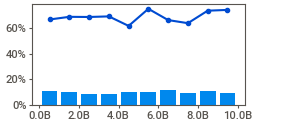
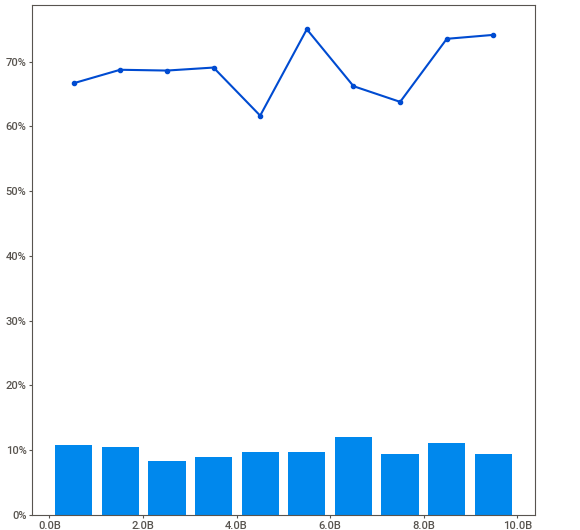
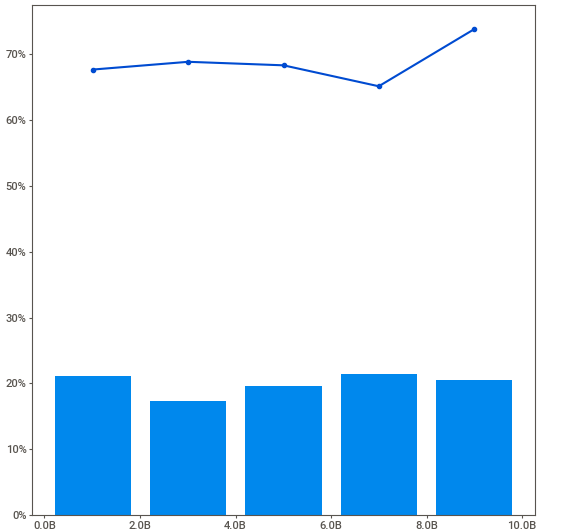
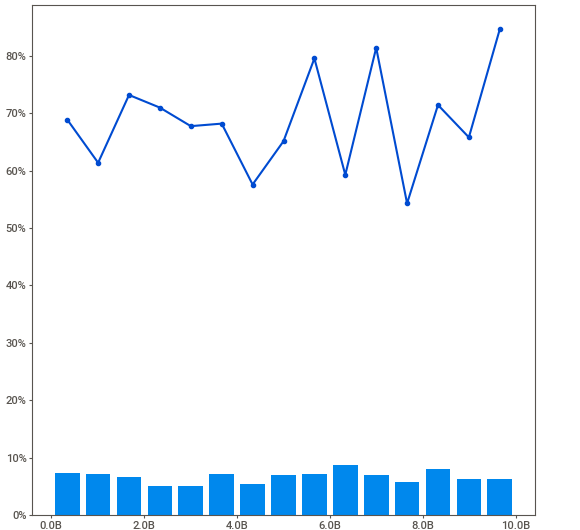
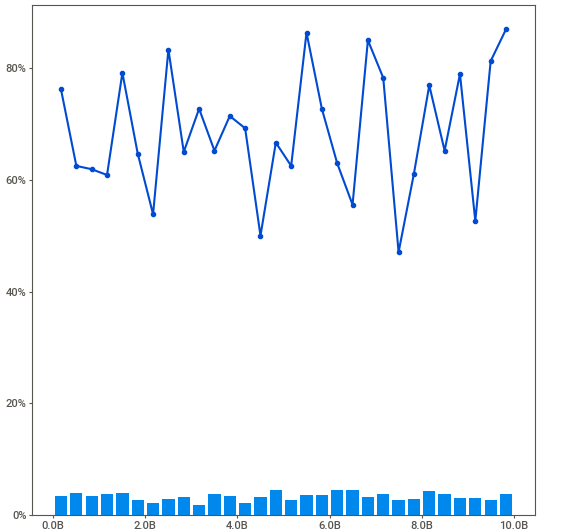
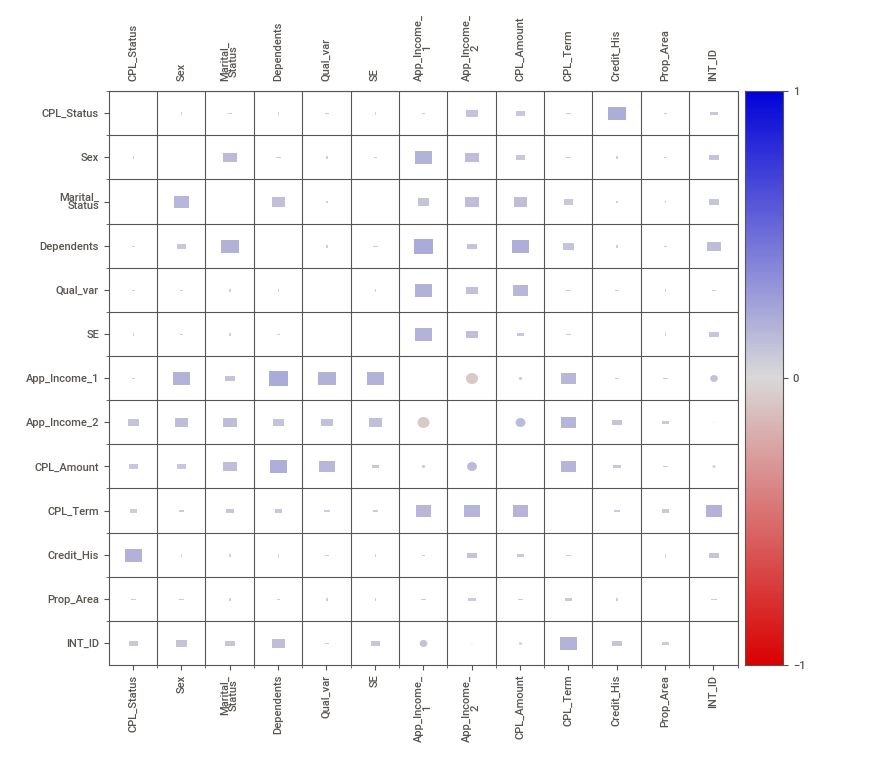
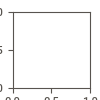

Report 'Report.html' was saved to storage.


In [ ]:
my_report.show_notebook(w=None, h=None,
scale=None,
layout='vertical',
filepath='Report.html')

# **`Let's try to handle the missing value of dataset`**

In [ ]:
data['Sex'].fillna(method='ffill', inplace=True)

In [ ]:
data['Marital_Status'].fillna(method='ffill', inplace=True)

In [ ]:
data.dtypes['Dependents']

dtype('O')

In [ ]:
data['Dependents'].astype('str')

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [ ]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data['Dependents']=data['Dependents'].astype(str).replace('3+', '3')

In [ ]:
median=int(data['Dependents'].median())

In [ ]:
data['Dependents']=data['Dependents'].astype(str).replace('nan', int(median))

In [ ]:
data['Dependents']=data['Dependents'].astype(float)

In [ ]:
data['Dependents']=data['Dependents'].astype(int)

In [ ]:
data['CPL_Amount']=data['CPL_Amount'].fillna(data['CPL_Amount'].median())

In [ ]:
data['SE'].fillna(method='ffill', inplace=True)

In [ ]:
data['CPL_Term']=data['CPL_Term'].fillna(data['CPL_Term'].median())

In [ ]:
data['Credit_His']=data['Credit_His'].fillna(data['Credit_His'].median())

In [ ]:
#Checking the null value

data.isnull().sum()

Loanapp_ID        0
Sex               0
Marital_Status    0
first_name        0
last_name         0
email             0
address           0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
CPL_Term          0
Credit_His        0
Prop_Area         0
INT_ID            0
Prev_ID           0
AGT_ID            0
CPL_Status        0
dtype: int64

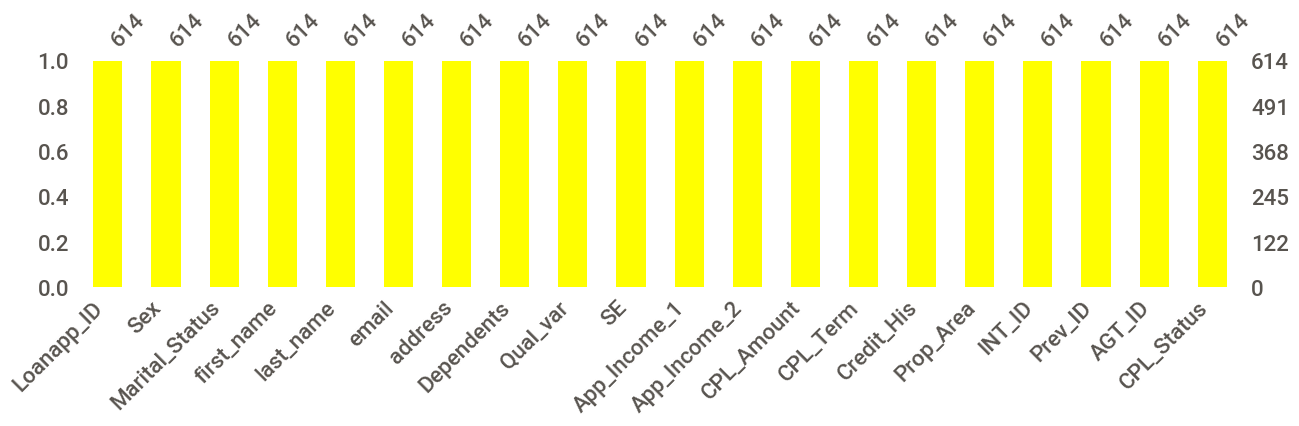

In [ ]:
#visualising the null value
import missingno as msno
msno.bar(data,figsize=(15,3),color='yellow')
plt.show()

# **`DATA VISUALISATION`**

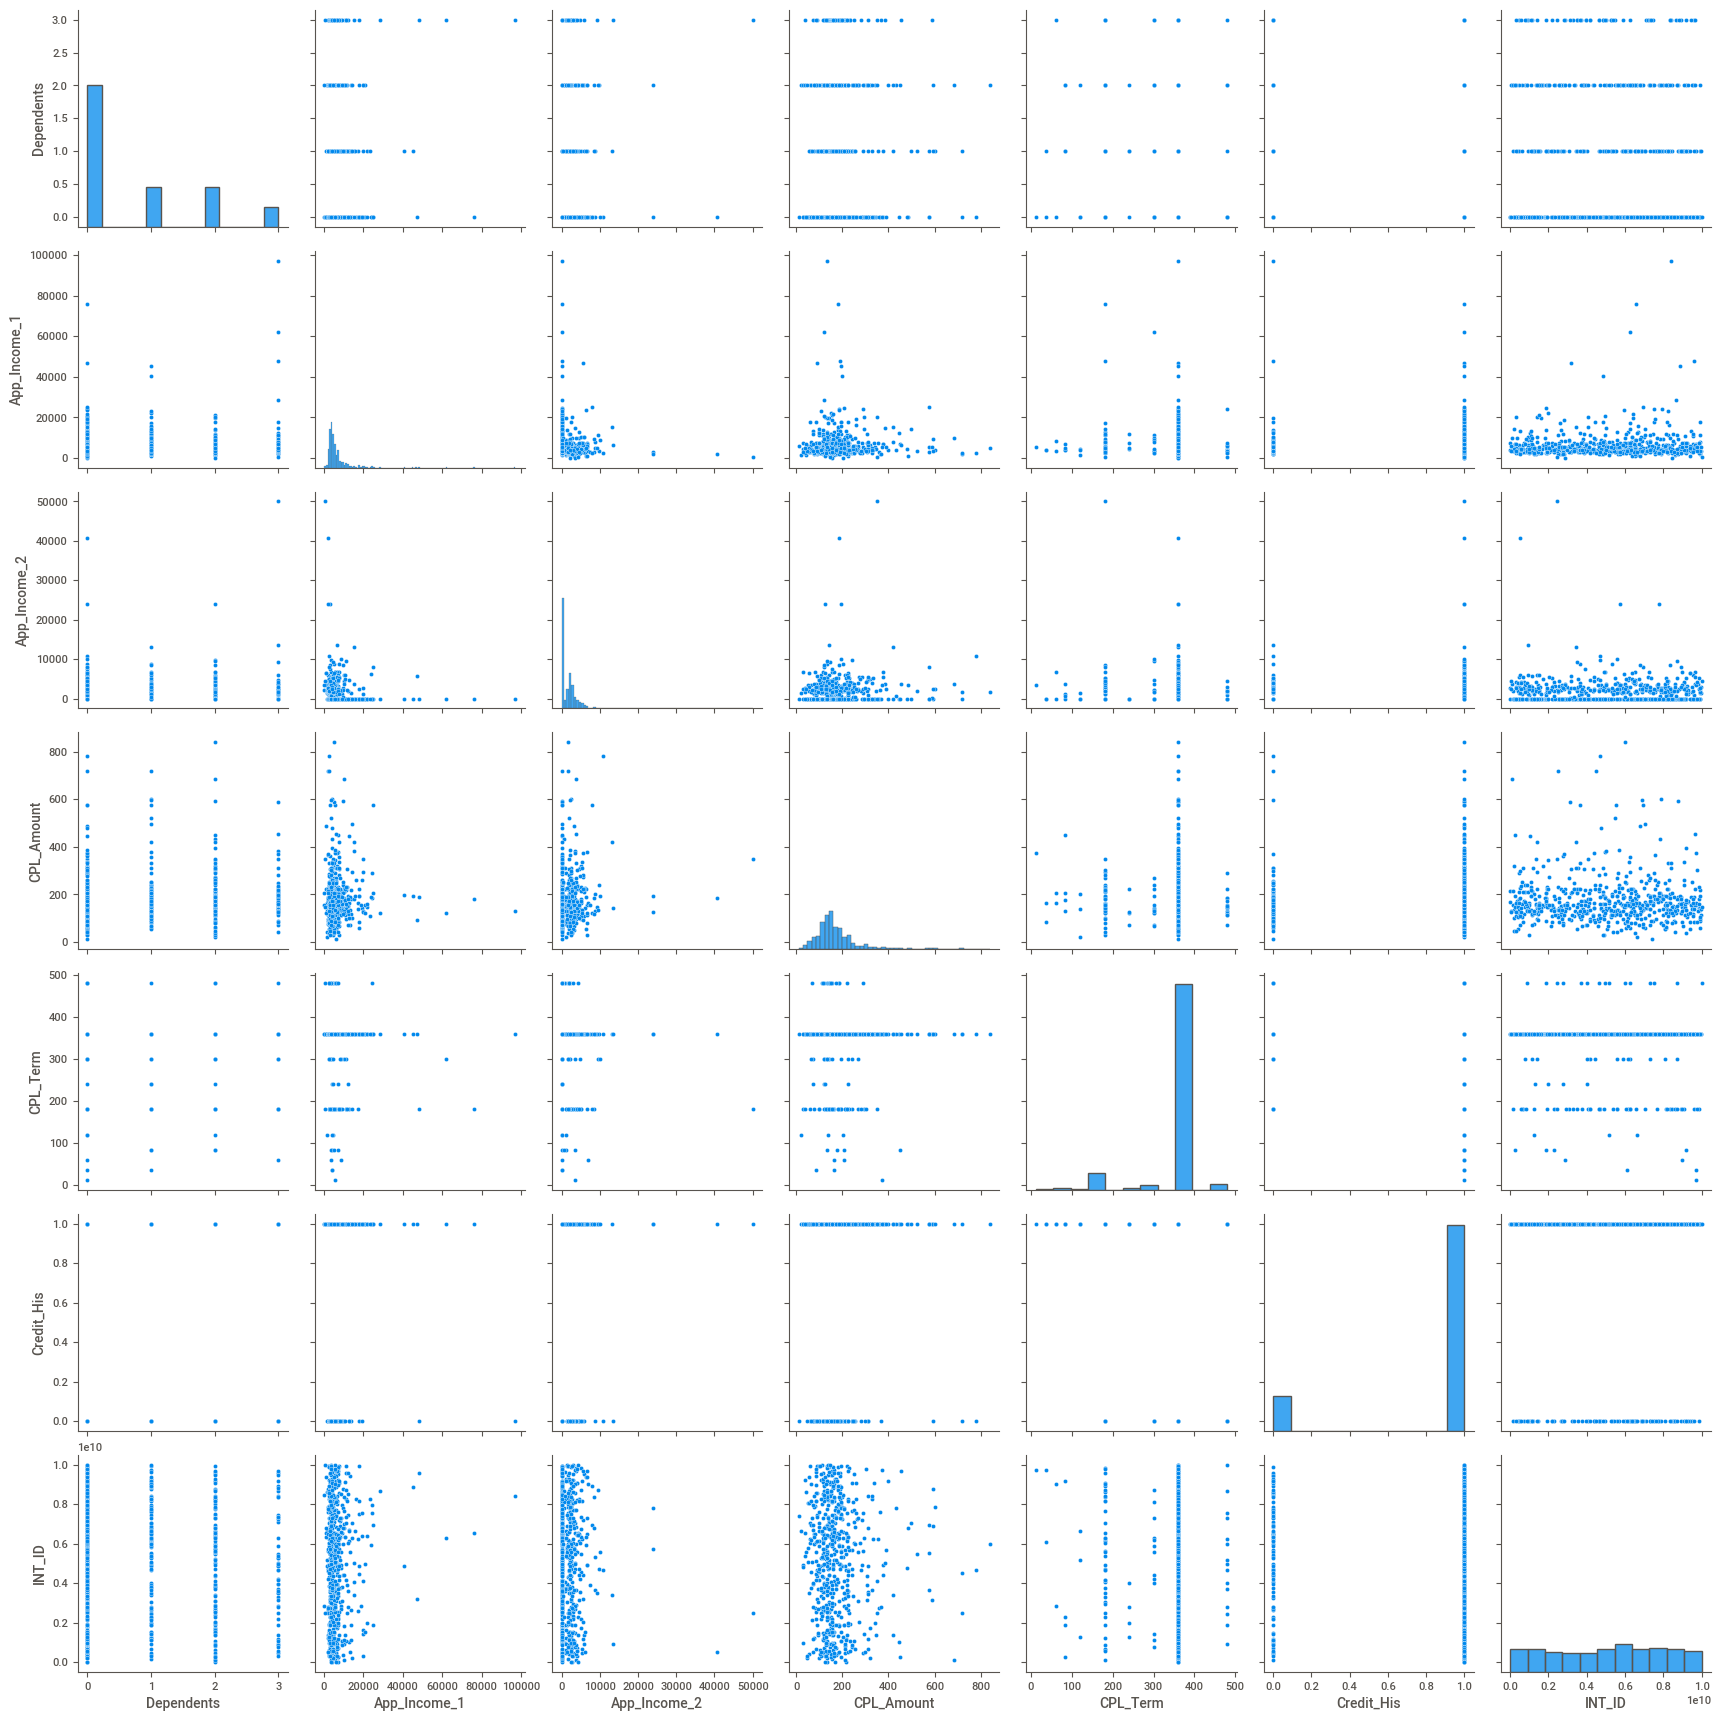

In [ ]:
sns.pairplot(data)

In [ ]:
data['Sex'].value_counts()

M    500
F    114
Name: Sex, dtype: int64

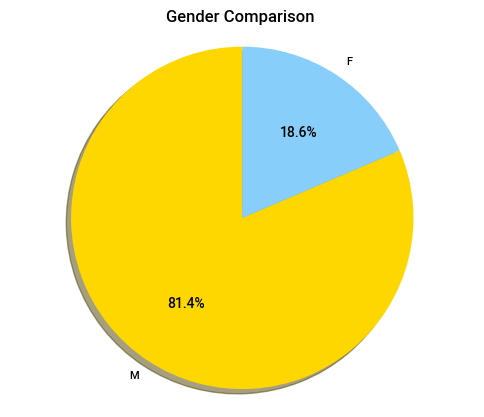

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
gender1=data.Sex.value_counts()
labels=np.array(gender1.index)
sizes = gender1.values
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Gender Comparison ')
plt.axis('equal')
plt.show()

In [ ]:
data.Marital_Status.value_counts()

Y    400
N    214
Name: Marital_Status, dtype: int64

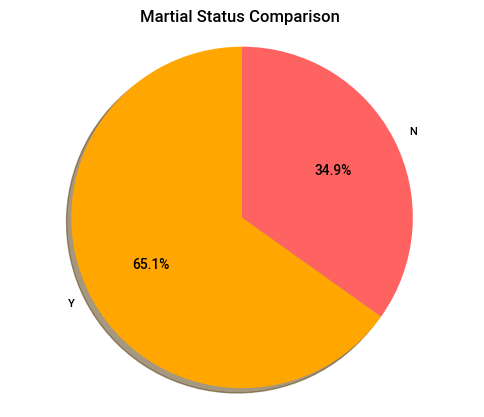

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
marital=data.Marital_Status.value_counts()
labels=np.array(marital.index)
sizes = marital.values
colors = ['#ffa600', '#ff6361']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Martial Status Comparison ')
plt.axis('equal')
plt.show()

In [ ]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


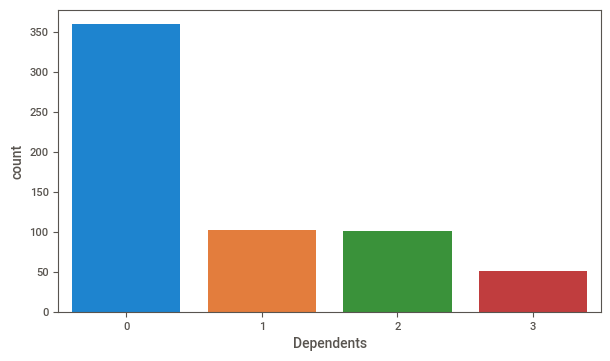

In [ ]:
fig, ax = plt.subplots(figsize =(7,4))
sns.countplot(data['Dependents'] , data =data)

In [ ]:
data['Qual_var'].value_counts()

Grad        480
Non Grad    134
Name: Qual_var, dtype: int64

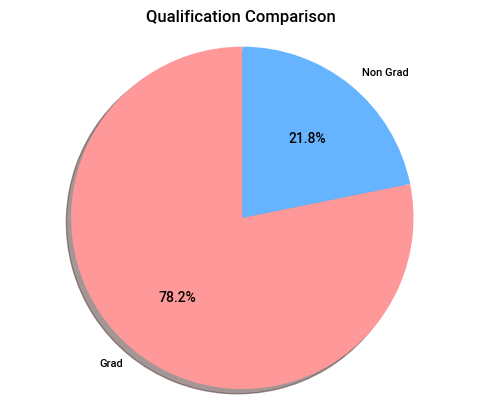

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
degree=data.Qual_var.value_counts()
labels=np.array(degree.index)
sizes = degree.values
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Qualification Comparison ')
plt.axis('equal')
plt.show()

In [ ]:
data['App_Income_1'].value_counts()

3000.0     9
7200.0     6
5499.6     6
3120.0     6
4999.2     5
          ..
11472.0    1
3900.0     1
11445.6    1
4620.0     1
6871.2     1
Name: App_Income_1, Length: 505, dtype: int64

In [ ]:
data['App_Income_1']=data['App_Income_1'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


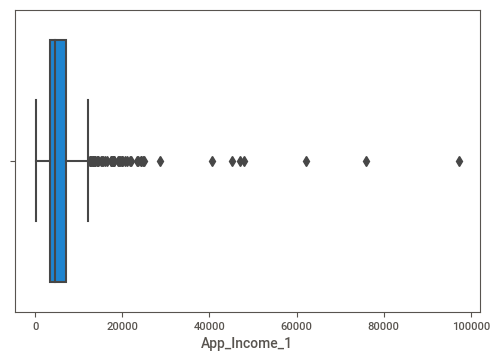

In [ ]:
sns.boxplot(data['App_Income_1'])

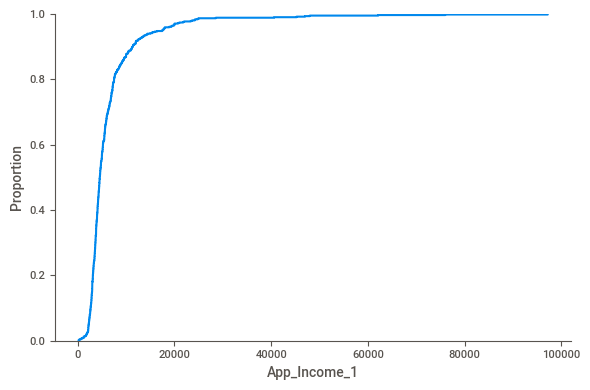

In [ ]:
sns.displot(data=data,x='App_Income_1', kind="ecdf",height=4,aspect=1.5)

In [ ]:
data['App_Income_2'].value_counts()

0.0       273
1999.2      5
2499.6      5
3000.0      5
2700.0      3
         ... 
7500.0      1
1506.0      1
2850.0      1
2235.6      1
3480.0      1
Name: App_Income_2, Length: 287, dtype: int64

In [ ]:
data.CPL_Amount.value_counts()

144.0    20
132.0    17
120.0    15
192.0    13
153.6    13
         ..
56.4      1
588.0     1
196.8     1
780.0     1
273.6     1
Name: CPL_Amount, Length: 219, dtype: int64

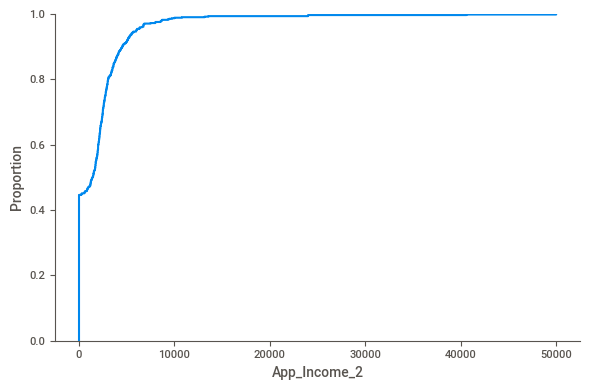

In [ ]:
sns.displot(data=data,x='App_Income_2', kind="ecdf",height=4,aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


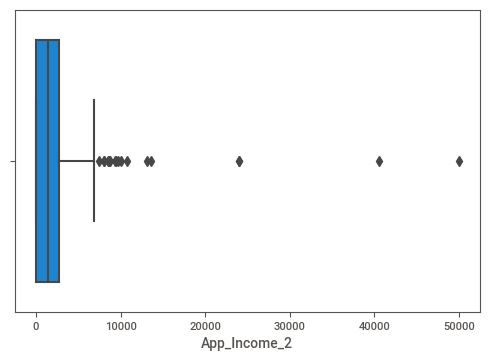

In [ ]:
sns.boxplot(data['App_Income_2'])

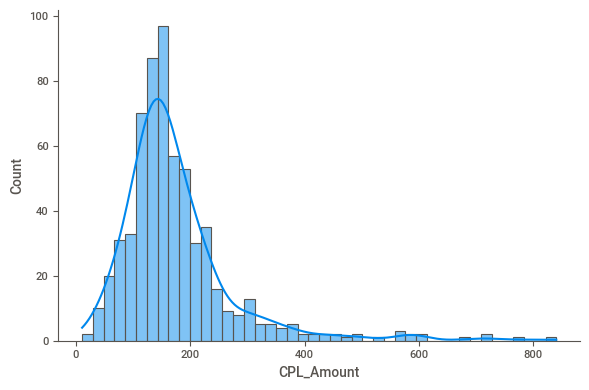

In [ ]:
sns.displot(data=data,x='CPL_Amount',height=4,aspect=1.5,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


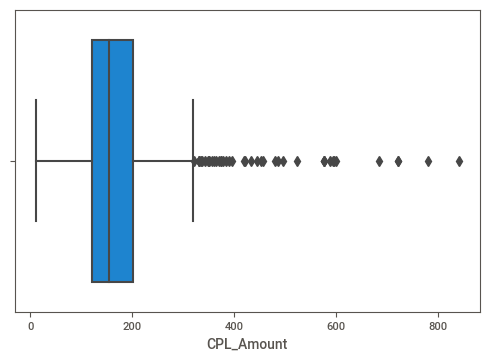

In [ ]:
sns.boxplot(data['CPL_Amount'])

In [ ]:
data.CPL_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64

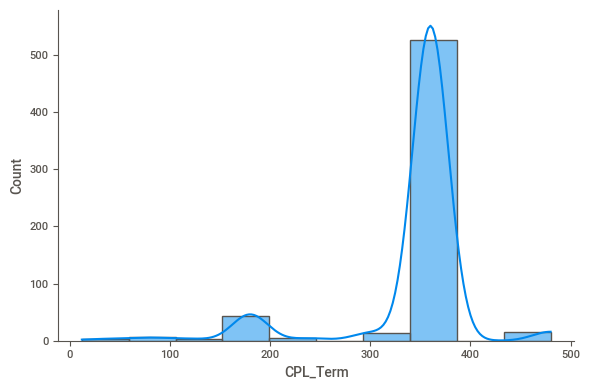

In [ ]:
sns.displot(data=data,x='CPL_Term',height=4,aspect=1.5,kde=True,bins=10)

In [ ]:
data.Credit_His.value_counts()

1.0    525
0.0     89
Name: Credit_His, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


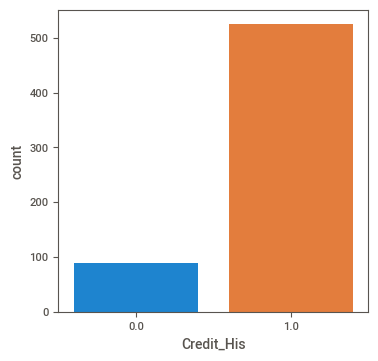

In [ ]:
fig, ax = plt.subplots(figsize =(4,4))
sns.countplot(data['Credit_His'])

In [ ]:
data.Prop_Area.value_counts()

Semi U    233
Urban     202
Rural     179
Name: Prop_Area, dtype: int64

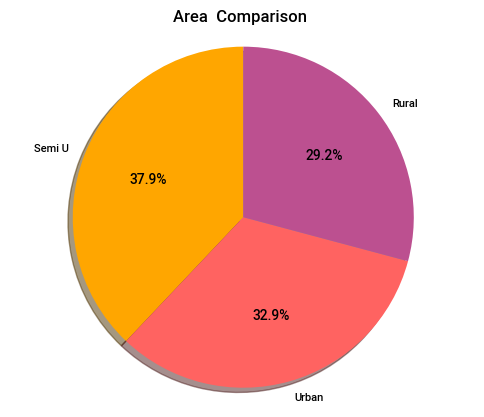

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
Area=data.Prop_Area.value_counts()
labels=np.array(Area.index)
sizes = Area.values
colors = ['#ffa600', '#ff6361','#bc5090']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Area  Comparison ')
plt.axis('equal')
plt.show()

In [ ]:
data.CPL_Status.value_counts()

Y    422
N    192
Name: CPL_Status, dtype: int64

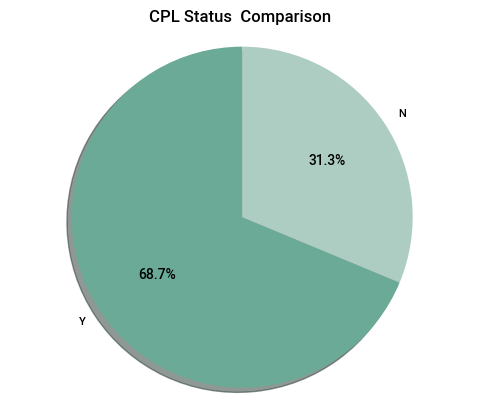

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
cpl=data.CPL_Status.value_counts()
labels=np.array(cpl.index)
sizes = cpl.values
colors = ['#6aaa96', '#aecdc2']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('CPL Status  Comparison ')
plt.axis('equal')
plt.show()

# ***`Other Column vs CPL_Status`***

In [ ]:
data.groupby(['Sex','CPL_Status']).size()

Sex  CPL_Status
F    N              37
     Y              77
M    N             155
     Y             345
dtype: int64

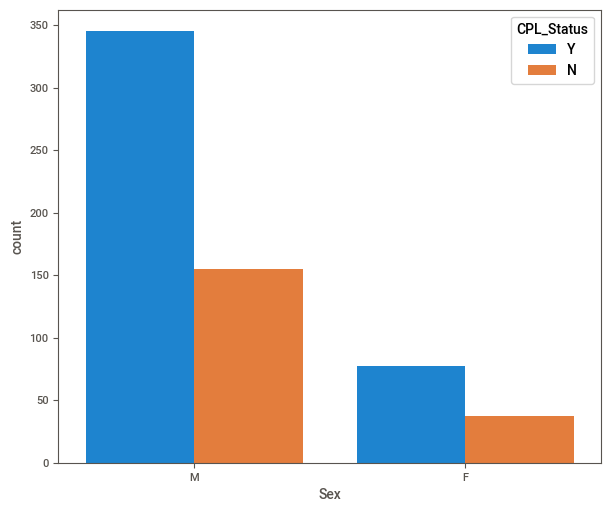

In [ ]:
fig, ax = plt.subplots(figsize =(7,6))
sns.countplot(x='Sex', hue="CPL_Status", data=data)

In [ ]:
data.groupby(['Marital_Status','CPL_Status']).size()

Marital_Status  CPL_Status
N               N              79
                Y             135
Y               N             113
                Y             287
dtype: int64

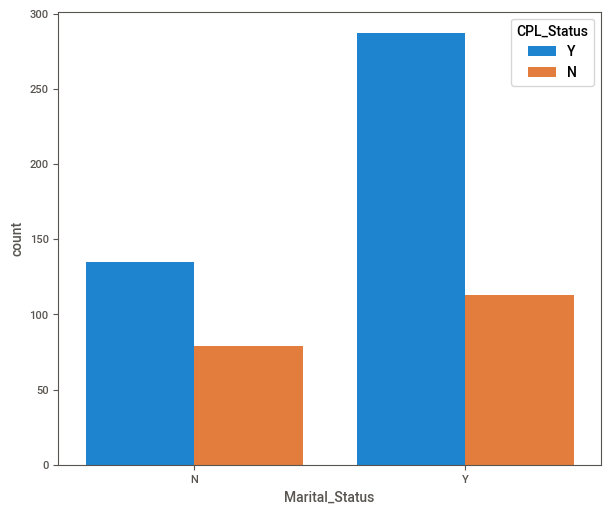

In [ ]:
fig, ax = plt.subplots(figsize =(7,6))
sns.countplot(x='Marital_Status', hue="CPL_Status", data=data)

In [ ]:
data.groupby(['Dependents','CPL_Status']).size()

Dependents  CPL_Status
0           N             113
            Y             247
1           N              36
            Y              66
2           N              25
            Y              76
3           N              18
            Y              33
dtype: int64

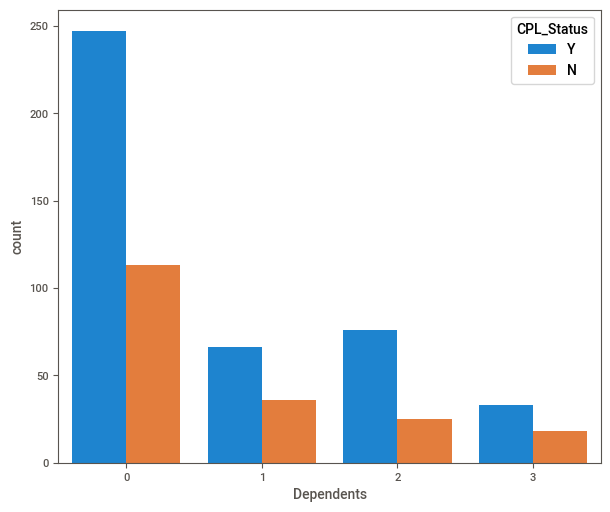

In [ ]:
fig, ax = plt.subplots(figsize =(7,6))
sns.countplot(x='Dependents', hue="CPL_Status", data=data)

In [ ]:
data.groupby(['Qual_var','CPL_Status']).size()

Qual_var  CPL_Status
Grad      N             140
          Y             340
Non Grad  N              52
          Y              82
dtype: int64

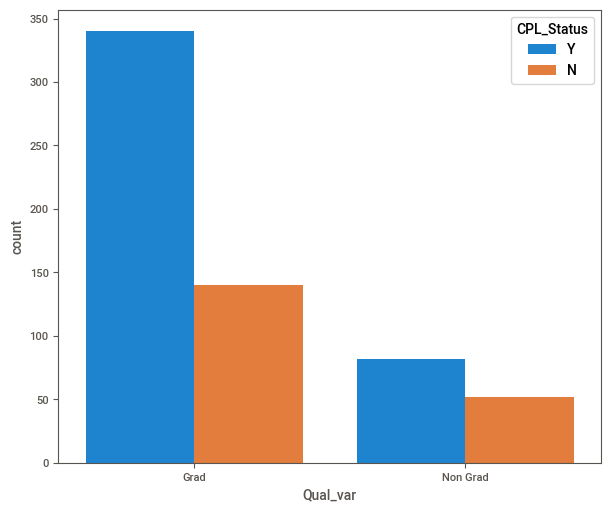

In [ ]:
fig, ax = plt.subplots(figsize =(7,6))
sns.countplot(x='Qual_var', hue="CPL_Status", data=data)

In [ ]:
data.groupby(['SE','CPL_Status']).size()

SE  CPL_Status
N   N             166
    Y             362
Y   N              26
    Y              60
dtype: int64

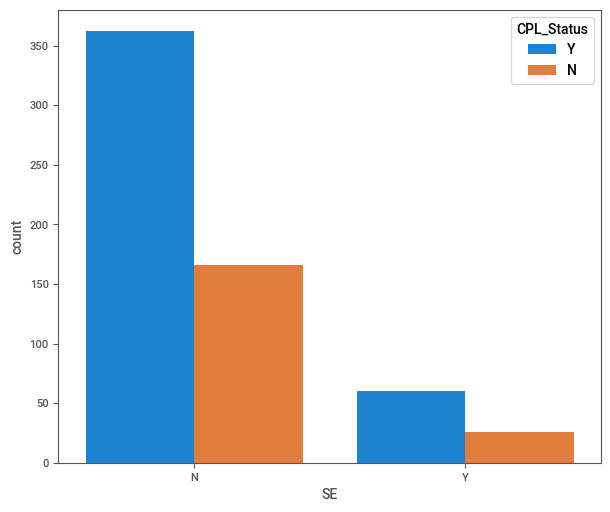

In [ ]:
fig, ax = plt.subplots(figsize =(7,6))
sns.countplot(x='SE', hue="CPL_Status", data=data)

In [ ]:
data.groupby(['CPL_Term','CPL_Status']).size()

CPL_Term  CPL_Status
12.0      Y               1
36.0      N               2
60.0      Y               2
84.0      N               1
          Y               3
120.0     Y               3
180.0     N              15
          Y              29
240.0     N               1
          Y               3
300.0     N               5
          Y               8
360.0     N             159
          Y             367
480.0     N               9
          Y               6
dtype: int64

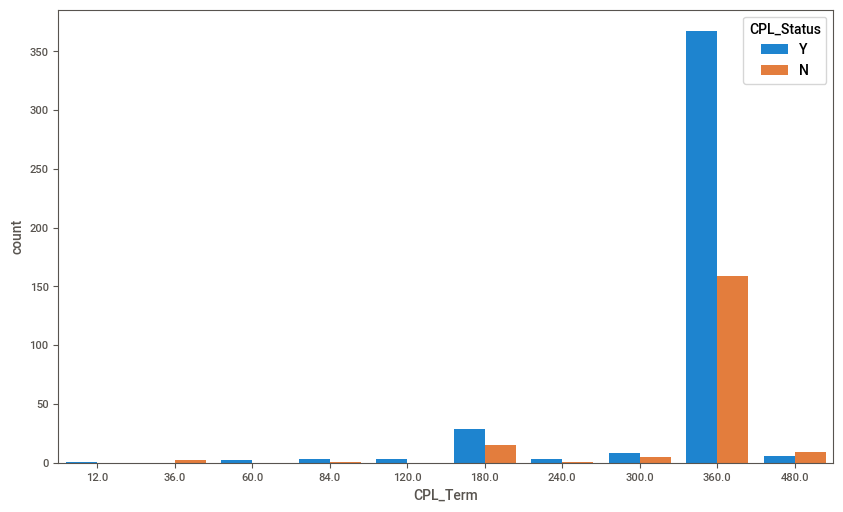

In [ ]:
fig, ax = plt.subplots(figsize =(10,6))
sns.countplot(x='CPL_Term', hue="CPL_Status", data=data)

In [ ]:
data.groupby(['Credit_His',"CPL_Status"]).size()

Credit_His  CPL_Status
0.0         N              82
            Y               7
1.0         N             110
            Y             415
dtype: int64

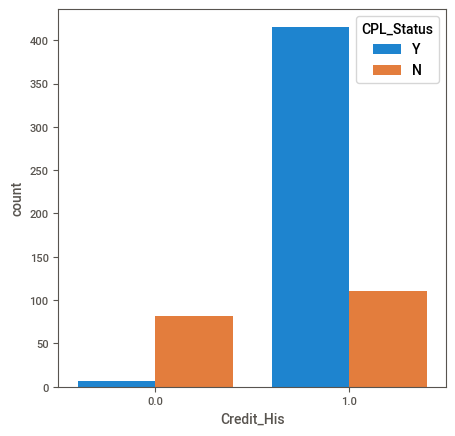

In [ ]:
fig, ax = plt.subplots(figsize =(5,5))
sns.countplot(x='Credit_His', hue="CPL_Status", data=data)

In [ ]:
data.groupby(['Prop_Area','CPL_Status']).size()

Prop_Area  CPL_Status
Rural      N              69
           Y             110
Semi U     N              54
           Y             179
Urban      N              69
           Y             133
dtype: int64

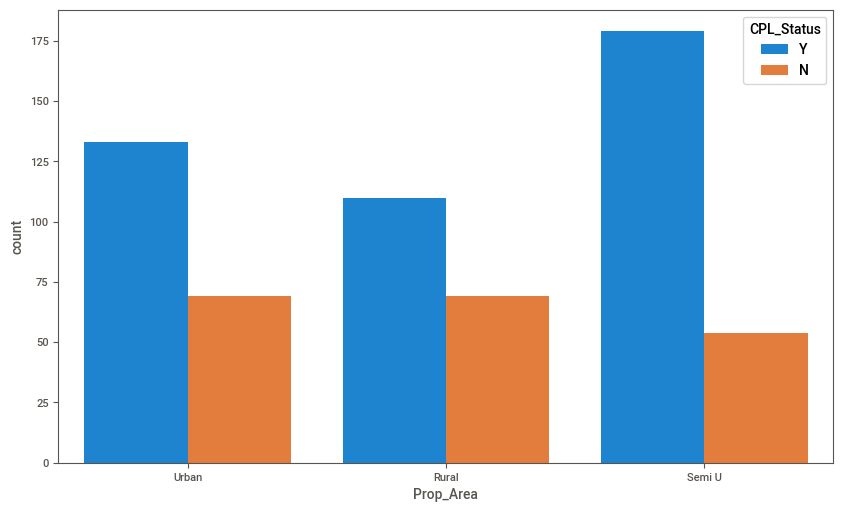

In [ ]:
fig, ax = plt.subplots(figsize =(10,6))
sns.countplot(x='Prop_Area', hue="CPL_Status", data=data)

***`BOXPLOT VISUALISATION`***


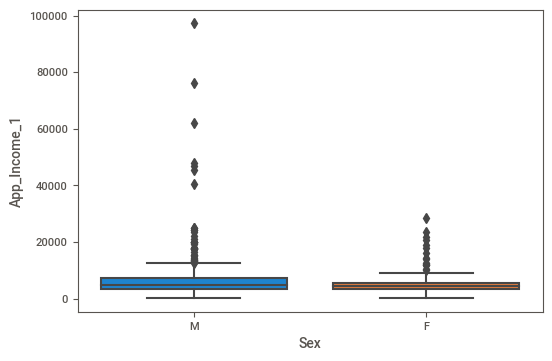

In [ ]:
ax = sns.boxplot(x="Sex", y="App_Income_1", data=data)

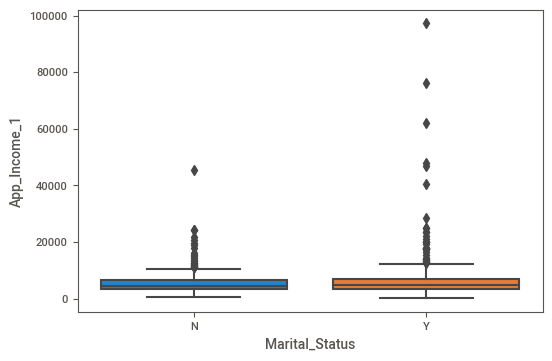

In [ ]:
ax = sns.boxplot(x="Marital_Status", y="App_Income_1", data=data)

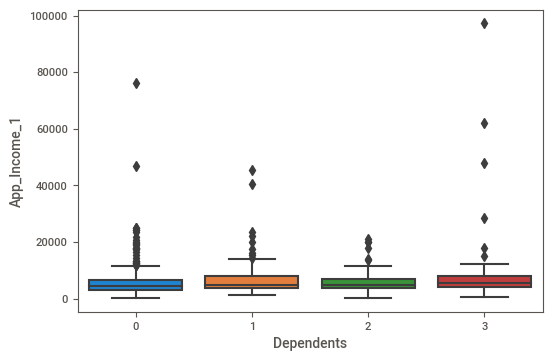

In [ ]:
ax = sns.boxplot(x="Dependents", y="App_Income_1", data=data)

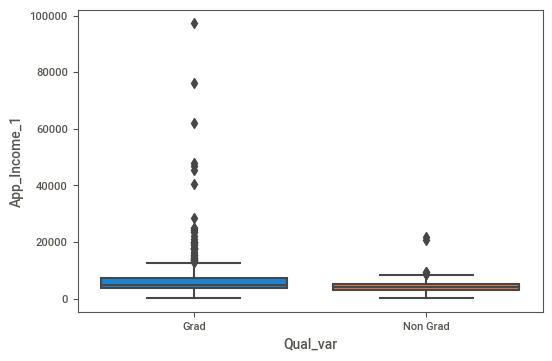

In [ ]:
ax = sns.boxplot(x="Qual_var", y="App_Income_1", data=data)

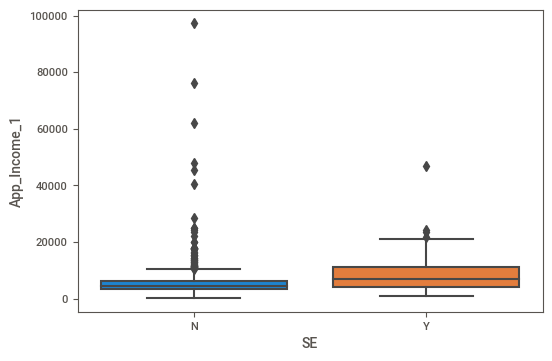

In [ ]:
ax = sns.boxplot(x="SE", y="App_Income_1", data=data)

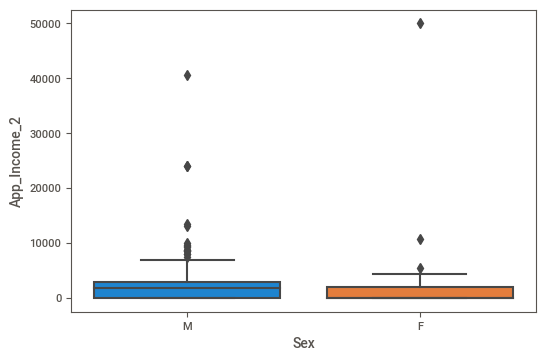

In [ ]:
ax = sns.boxplot(x="Sex", y="App_Income_2", data=data)

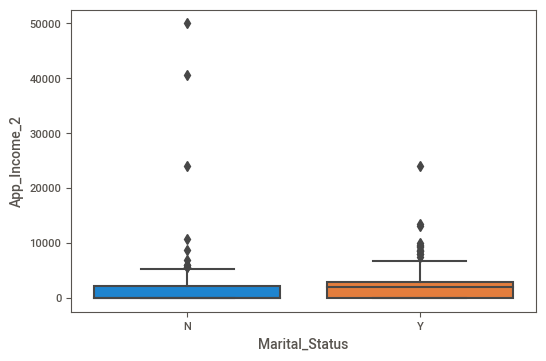

In [ ]:
ax = sns.boxplot(x="Marital_Status", y="App_Income_2", data=data)

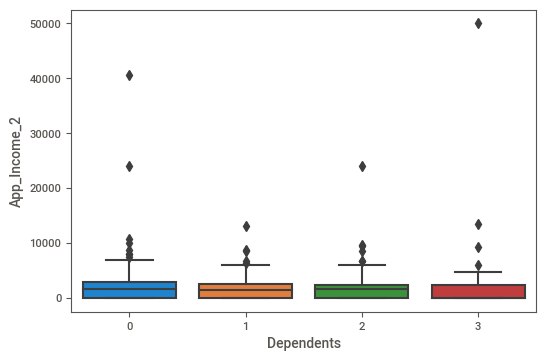

In [ ]:
ax = sns.boxplot(x="Dependents", y="App_Income_2", data=data)

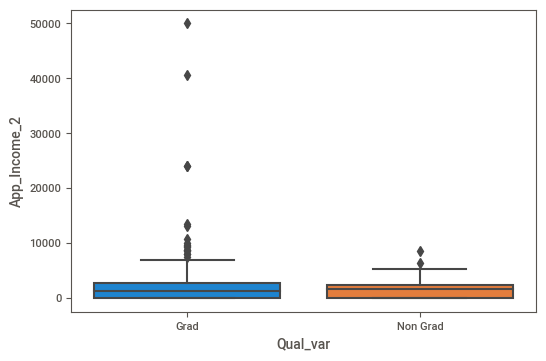

In [ ]:
ax = sns.boxplot(x="Qual_var", y="App_Income_2", data=data)

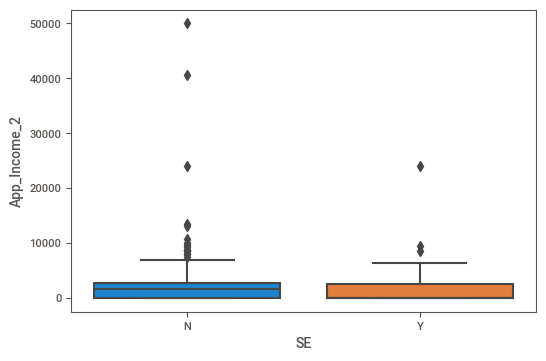

In [ ]:
ax = sns.boxplot(x="SE", y="App_Income_2", data=data)

In [ ]:
data.keys()

Index(['Loanapp_ID', 'Sex', 'Marital_Status', 'first_name', 'last_name',
       'email', 'address', 'Dependents', 'Qual_var', 'SE', 'App_Income_1',
       'App_Income_2', 'CPL_Amount', 'CPL_Term', 'Credit_His', 'Prop_Area',
       'INT_ID', 'Prev_ID', 'AGT_ID', 'CPL_Status'],
      dtype='object')

# ***`Data Preprocessing`***

***`Label Encoding`***

In [ ]:
from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()

In [ ]:
data['Sex']= ln.fit_transform(data['Sex'])

In [ ]:
data['Marital_Status']= ln.fit_transform(data['Marital_Status'])

In [ ]:
data['Qual_var']= ln.fit_transform(data['Qual_var'])

In [ ]:
data['SE']= ln.fit_transform(data['SE'])

In [ ]:
data['Prop_Area']= ln.fit_transform(data['Prop_Area'])

In [ ]:
data['CPL_Status']= ln.fit_transform(data['CPL_Status'])

In [ ]:
data.head(10)

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,1,0,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,0,0,7018,0.0,153.6,360.0,1.0,2,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,1
1,CPL001003,1,1,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,0,0,5499,1809.6,153.6,360.0,1.0,0,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,0
2,CPL001005,1,1,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,0,1,3600,0.0,79.2,360.0,1.0,2,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,1
3,CPL001006,1,1,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,1,0,3099,2829.6,144.0,360.0,1.0,2,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,1
4,CPL001008,1,0,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,0,0,7200,0.0,169.2,360.0,1.0,2,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,1
5,CPL001011,1,1,Alf,Banger,abanger6@51.la,62479 Tony Trail,2,0,1,6500,5035.2,320.4,360.0,1.0,2,1706531990,36-046-3652,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,1
6,CPL001013,1,1,Gunilla,Etchells,getchells7@oracle.com,19 Nevada Road,0,1,0,2799,1819.2,114.0,360.0,1.0,2,4308436125,30-577-3135,Mozilla/5.0 (X11; Linux i686) AppleWebKit/535....,1
7,CPL001014,1,1,Norman,Code,ncode8@php.net,6444 Grasskamp Parkway,3,0,0,3643,3004.8,189.6,360.0,0.0,1,8920517681,84-493-5438,Mozilla/5.0 (Windows NT 6.1; rv:12.0) Gecko/ 2...,0
8,CPL001018,1,1,Ramsay,Willoughby,rwilloughbya@sun.com,7530 Karstens Trail,2,0,0,4807,1831.2,201.6,360.0,1.0,2,6575222730,70-958-5848,Mozilla/6.0 (Windows NT 6.2; WOW64; rv:16.0.1)...,1
9,CPL001020,1,1,Elsa,Hickenbottom,ehickenbottomb@storify.com,54 Delaware Avenue,1,0,0,15409,13161.6,418.8,360.0,1.0,1,3424435449,91-805-0829,Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWe...,0


# **`Correlation`**

In [ ]:
data.corr()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,CPL_Status
Sex,1.000000,0.371532,0.165458,0.049480,0.011676,0.046229,0.086991,-0.006448,-0.075813,0.005658,-0.019854,-0.029664,0.012213
Marital_Status,0.371532,1.000000,0.336372,0.014097,-0.000257,0.049050,0.077760,0.079462,-0.095364,0.009519,0.004415,0.009890,0.089072
Dependents,0.165458,0.336372,1.000000,0.055752,0.046473,0.118203,0.030430,0.128720,-0.103864,-0.040160,-0.000244,-0.035005,0.010118
Qual_var,0.049480,0.014097,0.055752,1.000000,-0.008734,-0.140762,-0.062290,-0.109693,-0.073928,-0.073658,-0.065243,-0.009619,-0.085884
SE,0.011676,-0.000257,0.046473,-0.008734,1.000000,0.122729,-0.021807,-0.028932,-0.027941,0.006209,-0.037106,-0.006343,0.009035
App_Income_1,0.046229,0.049050,0.118203,-0.140762,0.122729,1.000000,-0.116604,0.023228,-0.046529,-0.018616,-0.009500,0.067285,-0.004713
App_Income_2,0.086991,0.077760,0.030430,-0.062290,-0.021807,-0.116604,1.000000,0.094974,-0.059383,0.011134,0.010522,-0.012481,-0.059187
CPL_Amount,-0.006448,0.079462,0.128720,-0.109693,-0.028932,0.023228,0.094974,1.000000,-0.006964,0.010923,0.017465,-0.027505,0.032853
CPL_Term,-0.075813,-0.095364,-0.103864,-0.073928,-0.027941,-0.046529,-0.059383,-0.006964,1.000000,-0.004705,-0.076120,-0.020814,-0.022549
Credit_His,0.005658,0.009519,-0.040160,-0.073658,0.006209,-0.018616,0.011134,0.010923,-0.004705,1.000000,0.001963,-0.006379,0.540556


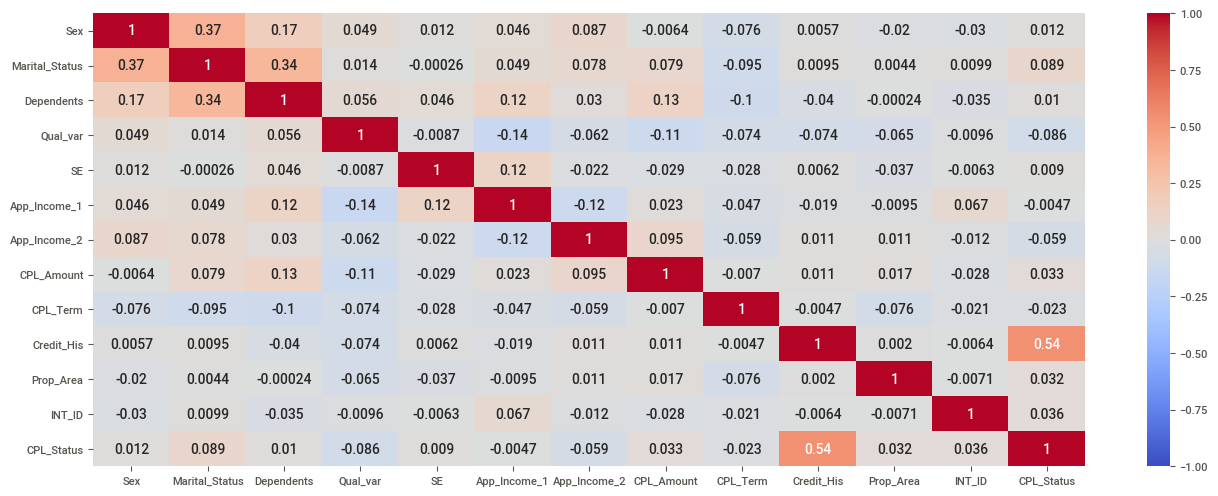

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# **`Splitting the dataset`**

In [ ]:
x = data.iloc[:,[1,2,7,8,9,10,11,12,13,14,15]]
x

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area
0,1,0,0,0,0,7018,0.0,153.6,360.0,1.0,2
1,1,1,1,0,0,5499,1809.6,153.6,360.0,1.0,0
2,1,1,0,0,1,3600,0.0,79.2,360.0,1.0,2
3,1,1,0,1,0,3099,2829.6,144.0,360.0,1.0,2
4,1,0,0,0,0,7200,0.0,169.2,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,3480,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4927,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,9686,288.0,253.0,360.0,1.0,2
612,1,1,2,0,0,9099,0.0,187.0,360.0,1.0,2


In [ ]:
y = data.iloc[:,[-1]]
y

,CPL_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
xtrain.shape

(491, 11)

In [ ]:
xtest.shape

(123, 11)

In [ ]:
ytrain.shape

(491, 1)

In [ ]:
ytest.shape

(123, 1)

# **`Model Training`**

# **`Let's Apply Different Machine algo on dataset`**

# **`Logistic Regression :`**  
***`Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. `***

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st= StandardScaler()    
xtrain= st.fit_transform(xtrain)
xtest = st.fit_transform(xtest)   


In [ ]:
model1 = lr.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred1 = model1.predict(xtest)
y_pred1

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

# **`SVC :`**
***`The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.`*** 

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

model2 = svc.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
y_pred2= model2.predict(xtest)

In [ ]:
y_pred2

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

# **`K-nearest Neighbor(KNN) : `**

***`KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).`***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
model3 = knn.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred3 = model3.predict(xtest)
y_pred3

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

# **`Decision Tree :`**
***`A Decision Tree is a supervised Machine learning algorithm. It is used in both classification and regression algorithms. The decision tree is like a tree with nodes. The branches depend on a number of factors. It splits data into branches like these till it achieves a threshold value. A decision tree consists of the root nodes, children nodes, and leaf nodes.`***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
model4 = dtc.fit(xtrain,ytrain)

In [ ]:
y_pred4 = model4.predict(xtest)
y_pred4

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

# **`Random Forest :`**
***`Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.`***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(n_estimators=100)

In [ ]:
model5 = clf.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred5 = model5.predict(xtest)

In [ ]:
y_pred5

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

# **`XGBoost Classification`**

***`XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.)`***

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
model6 = xgb.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred6 = model6.predict(xtest)

In [ ]:
y_pred6

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

# **Checking Accuracy**

In [ ]:
x.shape

(614, 11)

In [ ]:
y.shape

(614, 1)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.metrics import accuracy_score

## ***`Accuracy Score of Logistic Regression`***

In [ ]:
print("Accuracy_score of Logistic Regression",round(accuracy_score(ytest,y_pred1),2))

Accuracy_score of Logistic Regression 0.84


In [ ]:
skf=StratifiedKFold(n_splits=5)

In [ ]:
accuracy= []

In [ ]:
skf.get_n_splits(x,y)

5

In [ ]:
# x is feature set and y is your target

for train_index,test_index in skf.split(x,y):
    print("train",train_index,"Validation",test_index)
    x1train,x1test =x.iloc[train_index],x.iloc[test_index]
    y1train,y1test = y.iloc[train_index],y.iloc[test_index]
    x1train=st.fit_transform(x1train)
    x1test=st.fit_transform(x1test)

    lr.fit(x1train,y1train)
    prediction=lr.predict(x1test)
    score=accuracy_score(prediction,y1test)
    accuracy.append(score)

train [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
for i in range(0,5):
    print(f"Iteration {i+1} of kfold 5")
    print(f"Accuracy_Score of Logistic Regression in Iteration {i+1} is : ",round(accuracy[i],2))

Iteration 1 of kfold 5
Accuracy_Score of Logistic Regression in Iteration 1 is :  0.81
Iteration 2 of kfold 5
Accuracy_Score of Logistic Regression in Iteration 2 is :  0.78
Iteration 3 of kfold 5
Accuracy_Score of Logistic Regression in Iteration 3 is :  0.78
Iteration 4 of kfold 5
Accuracy_Score of Logistic Regression in Iteration 4 is :  0.85
Iteration 5 of kfold 5
Accuracy_Score of Logistic Regression in Iteration 5 is :  0.82


In [ ]:
from statistics import mean
print("The average accuracy score of Logistic Regression is",round(mean(accuracy),2))

The average accuracy score of Logistic Regression is 0.81


## ***`Accuracy score of Support Vector Classifier`***

In [ ]:
print("Accuracy_score of Support Vector Classifier",round(accuracy_score(ytest,y_pred2),2))

Accuracy_score of Support Vector Classifier 0.84


In [ ]:
accuracy_svc =[]

In [ ]:
# x is feature set and y is your target

for train_index,test_index in skf.split(x,y):
    print("train",train_index,"Validation",test_index)
    x1train,x1test =x.iloc[train_index],x.iloc[test_index]
    y1train,y1test = y.iloc[train_index],y.iloc[test_index]
    x1train=st.fit_transform(x1train)
    x1test=st.fit_transform(x1test)

    svc.fit(x1train,y1train)
    prediction=svc.predict(x1test)
    score=accuracy_score(prediction,y1test)
    accuracy_svc.append(score)

train [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 113 114 115 116 117 119 120 121 122 123 124 236 241 245
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: Convergence

In [ ]:
for i in range(0,5):
    print(f"Iteration {i+1} of kfold 5")
    print(f"Accuracy_Score of Support Vector Classifier in Iteration {i+1} is : ",round(accuracy_svc[i],2))

Iteration 1 of kfold 5
Accuracy_Score of Support Vector Classifier in Iteration 1 is :  0.81
Iteration 2 of kfold 5
Accuracy_Score of Support Vector Classifier in Iteration 2 is :  0.78
Iteration 3 of kfold 5
Accuracy_Score of Support Vector Classifier in Iteration 3 is :  0.78
Iteration 4 of kfold 5
Accuracy_Score of Support Vector Classifier in Iteration 4 is :  0.85
Iteration 5 of kfold 5
Accuracy_Score of Support Vector Classifier in Iteration 5 is :  0.82


In [ ]:
print("The average accuracy score of Support Vector Classifier is",round(mean(accuracy_svc),2))

The average accuracy score of Support Vector Classifier is 0.81


## ***`Accuracy score of K-nearest Neighbor`***

In [ ]:
print("Accuracy_score of K-nearest Neighbor",round(accuracy_score(ytest,y_pred3),3))

Accuracy_score of K-nearest Neighbor 0.805


In [ ]:
accuracy_knn =[]

In [ ]:
# x is feature set and y is your target

for train_index,test_index in skf.split(x,y):
    print("train",train_index,"Validation",test_index)
    x1train,x1test =x.iloc[train_index],x.iloc[test_index]
    y1train,y1test = y.iloc[train_index],y.iloc[test_index]
    x1train=st.fit_transform(x1train)
    x1test=st.fit_transform(x1test)

    knn.fit(x1train,y1train)
    prediction=knn.predict(x1test)
    score=accuracy_score(prediction,y1test)
    accuracy_knn.append(score)

train [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

In [ ]:
for i in range(0,5):
    print(f"Iteration {i+1} of kfold 5")
    print(f"Accuracy_Score of K-nearest Neighbor in Iteration {i+1} is : ",round(accuracy_knn[i],2))

Iteration 1 of kfold 5
Accuracy_Score of K-nearest Neighbor in Iteration 1 is :  0.77
Iteration 2 of kfold 5
Accuracy_Score of K-nearest Neighbor in Iteration 2 is :  0.76
Iteration 3 of kfold 5
Accuracy_Score of K-nearest Neighbor in Iteration 3 is :  0.78
Iteration 4 of kfold 5
Accuracy_Score of K-nearest Neighbor in Iteration 4 is :  0.8
Iteration 5 of kfold 5
Accuracy_Score of K-nearest Neighbor in Iteration 5 is :  0.8


In [ ]:
print("The average accuracy score of K-nearest Neighbor is",round(mean(accuracy_knn),2))

The average accuracy score of K-nearest Neighbor is 0.78


## ***`Accuracy score of Decision Tree`***

In [ ]:
print("Accuracy_score of Decision Tree",round(accuracy_score(ytest,y_pred4),2))

Accuracy_score of Decision Tree 0.59


In [ ]:
accuracy_dtc = []

In [ ]:
# x is feature set and y is your target

for train_index,test_index in skf.split(x,y):
    print("train",train_index,"Validation",test_index)
    x1train,x1test =x.iloc[train_index],x.iloc[test_index]
    y1train,y1test = y.iloc[train_index],y.iloc[test_index]
    x1train=st.fit_transform(x1train)
    x1test=st.fit_transform(x1test)

    dtc.fit(x1train,y1train)
    prediction=dtc.predict(x1test)
    score=accuracy_score(prediction,y1test)
    accuracy_dtc.append(score)

train [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

In [ ]:
for i in range(0,5):
    print(f"Iteration {i+1} of kfold 5")
    print(f"Accuracy_Score of Decision Tree in Iteration {i+1} is : ",round(accuracy_dtc[i],2))

Iteration 1 of kfold 5
Accuracy_Score of Decision Tree in Iteration 1 is :  0.6
Iteration 2 of kfold 5
Accuracy_Score of Decision Tree in Iteration 2 is :  0.68
Iteration 3 of kfold 5
Accuracy_Score of Decision Tree in Iteration 3 is :  0.67
Iteration 4 of kfold 5
Accuracy_Score of Decision Tree in Iteration 4 is :  0.75
Iteration 5 of kfold 5
Accuracy_Score of Decision Tree in Iteration 5 is :  0.72


In [ ]:
print("The average accuracy score of Decision Tree is",round(mean(accuracy_dtc),2))

The average accuracy score of Decision Tree is 0.69


## ***`Accuracy score of Random Forest`***

In [ ]:
print("Accuracy_score of Random Forest",round(accuracy_score(ytest,y_pred5),2))

Accuracy_score of Random Forest 0.76


In [ ]:
accuracy_clf=[]

In [ ]:
# x is feature set and y is your target

for train_index,test_index in skf.split(x,y):
    print("train",train_index,"Validation",test_index)
    x1train,x1test =x.iloc[train_index],x.iloc[test_index]
    y1train,y1test = y.iloc[train_index],y.iloc[test_index]
    x1train=st.fit_transform(x1train)
    x1test=st.fit_transform(x1test)

    clf.fit(x1train,y1train)
    prediction=clf.predict(x1test)
    score=accuracy_score(prediction,y1test)
    accuracy_clf.append(score)

train [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


train [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 113 114 115 116 117 119 120 121 122 123 124 236 241 245
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Validation [236 241 245 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368]
train [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


train [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
for i in range(0,5):
    print(f"Iteration {i+1} of kfold 5")
    print(f"Accuracy_Score of Random Forest in Iteration {i+1} is : ",round(accuracy_clf[i],2))

Iteration 1 of kfold 5
Accuracy_Score of Random Forest in Iteration 1 is :  0.77
Iteration 2 of kfold 5
Accuracy_Score of Random Forest in Iteration 2 is :  0.76
Iteration 3 of kfold 5
Accuracy_Score of Random Forest in Iteration 3 is :  0.76
Iteration 4 of kfold 5
Accuracy_Score of Random Forest in Iteration 4 is :  0.84
Iteration 5 of kfold 5
Accuracy_Score of Random Forest in Iteration 5 is :  0.81


In [ ]:
print("The average accuracy score of Random Forest is",round(mean(accuracy_clf),2))

The average accuracy score of Random Forest is 0.79


## ***`Accuracy score of XGboost`***

In [ ]:
print("Accuracy_score of XGboost",round(accuracy_score(ytest,y_pred6),2))

Accuracy_score of XGboost 0.79


In [ ]:
accuracy_xg=[]

In [ ]:
# x is feature set and y is your target

for train_index,test_index in skf.split(x,y):
    print("train",train_index,"Validation",test_index)
    x1train,x1test =x.iloc[train_index],x.iloc[test_index]
    y1train,y1test = y.iloc[train_index],y.iloc[test_index]
    x1train=st.fit_transform(x1train)
    x1test=st.fit_transform(x1test)

    xgb.fit(x1train,y1train)
    prediction=xgb.predict(x1test)
    score=accuracy_score(prediction,y1test)
    accuracy_xg.append(score)

train [112 118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

train [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
for i in range(0,5):
    print(f"Iteration {i+1} of kfold 5")
    print(f"Accuracy_Score of XGBoost in Iteration {i+1} is : ",round(accuracy_xg[i],2))

Iteration 1 of kfold 5
Accuracy_Score of XGBoost in Iteration 1 is :  0.79
Iteration 2 of kfold 5
Accuracy_Score of XGBoost in Iteration 2 is :  0.78
Iteration 3 of kfold 5
Accuracy_Score of XGBoost in Iteration 3 is :  0.77
Iteration 4 of kfold 5
Accuracy_Score of XGBoost in Iteration 4 is :  0.81
Iteration 5 of kfold 5
Accuracy_Score of XGBoost in Iteration 5 is :  0.78


In [ ]:
print("The average accuracy score of XGBoost is",round(mean(accuracy_xg), 2))

The average accuracy score of XGBoost is 0.79


In [ ]:
data1 = [{'Logistics Regression': round(mean(accuracy), 2), 'SVC':round(mean(accuracy_svc), 2),
          'Decision Tree':round(mean(accuracy_dtc), 2),'Random Forest':round(mean(accuracy_clf), 2),
           'XGBoost':round(mean(accuracy_xg), 2)}]

In [ ]:
scores=pd.DataFrame(data1)

In [ ]:
scores

,Logistics Regression,SVC,Decision Tree,Random Forest,XGBoost
0,0.81,0.81,0.69,0.79,0.79


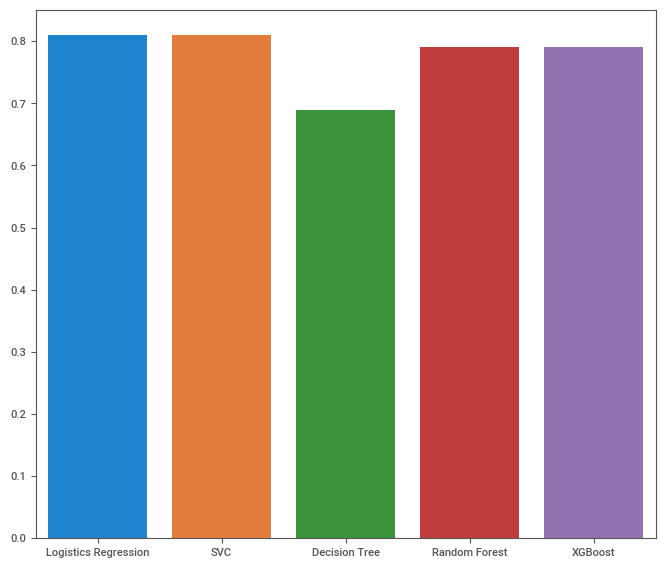

In [ ]:
fig, ax = plt.subplots(figsize =(8,7))
sns.barplot(data=scores)

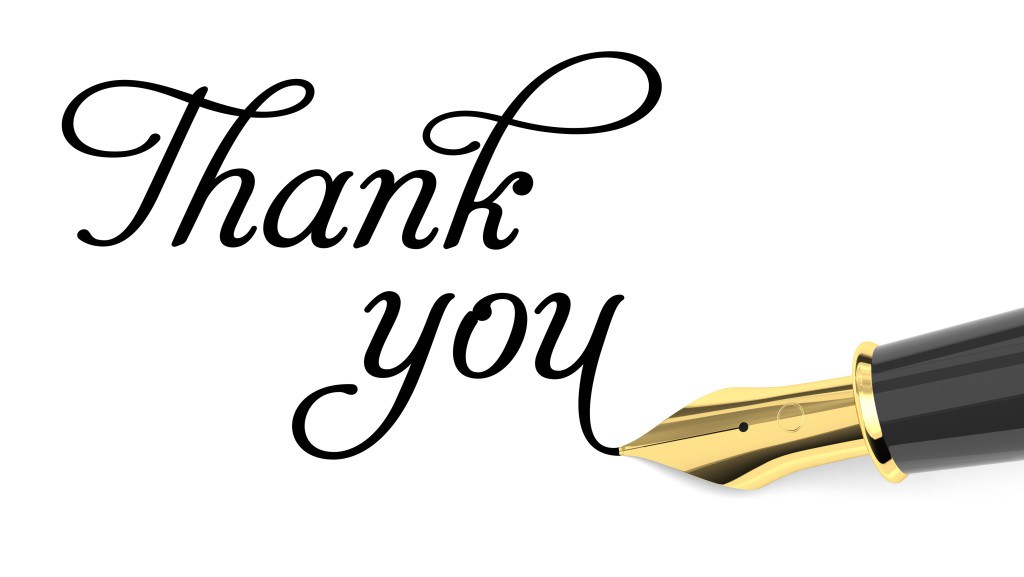